# Car Price Prediction

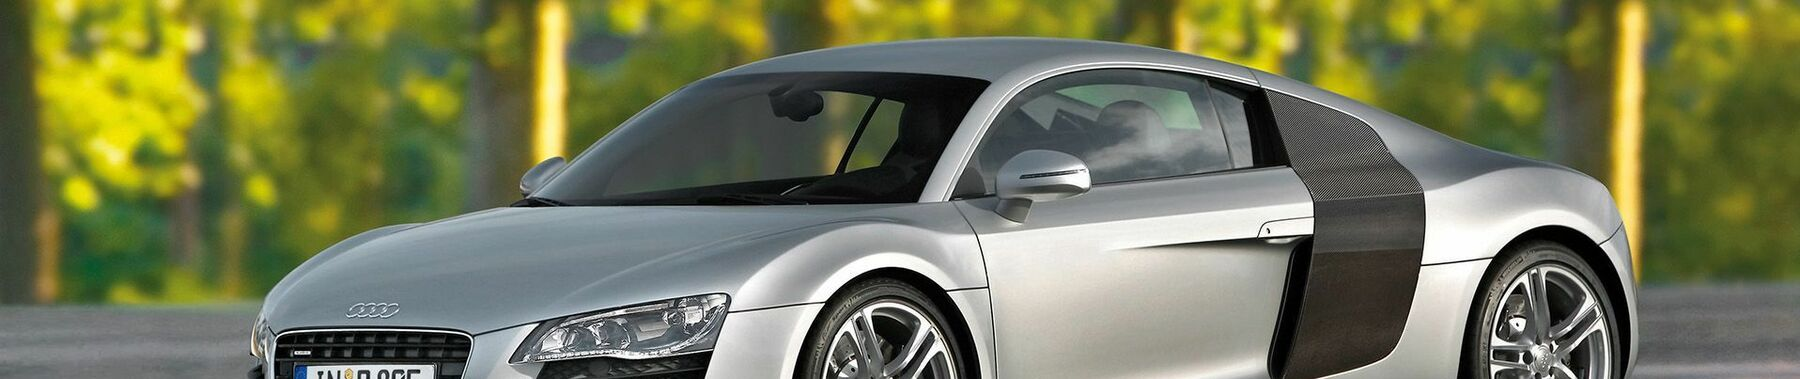

### About Dataset
Problem Statement: 

A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contacted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. 

The company wants to know:
- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

### Business Goal
I am required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Step 1: Data Loading and Understanding

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

------------------------------------------------------------------------------------------


car_ID  symboling          CarName fueltype aspiration doornumber  \
200     201         -1  volvo 145e (sw)      gas        std       four   
201     202         -1      volvo 144ea      gas      turbo       four   
202     203         -1      volvo 244dl      gas        std       four   
203     204         -1        volvo 246   diesel      turbo       four   
204     205         -1      volvo 264gl      gas      turbo       four   

    carbody drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
200   sedan        rwd          front      109.1  ...         141        mpfi   
201   sedan        rwd          front      109.1  ...         141        mpfi   
202   sedan        rwd          front      109.1  ...         173        mpfi   
203   sedan        rwd          front      109.1  ...         145         idi   
204   sedan        rwd          front      109.1  ...         141        mpfi   

     boreratio  stroke compressionratio horsepower  peakrpm citympg  \
200       3.78    3.15              9.5        114     5400      23   
201       3.78    3.15              8.7        160     5300      19   
202       3.58    2.87              8.8        134     5500      18   
203       3.01    3.40             23.0        106     4800      26   
204       3.78    3.15              9.5        114     5400      19   

     highwaympg    price  
200          28  16845.0  
201          25  19045.0  
202          23  21485.0  
203          27  22470.0  
204          25  22625.0  

[5 rows x 26 columns]

------------------------------------------------------------------------------------------


(205, 26)

The data has 205 rows, and 26 columns.
------------------------------------------------------------------------------------------


car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

------------------------------------------------------------------------------------------


car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

CarName fueltype aspiration doornumber carbody drivewheel  \
count             205      205        205        205     205        205   
unique            147        2          2          2       5          3   
top     toyota corona      gas        std       four   sedan        fwd   
freq                6      185        168        115      96        120   

       enginelocation enginetype cylindernumber fuelsystem  
count             205        205            205        205  
unique              2          7              7          8  
top             front        ohc           four       mpfi  
freq              202        148            159         94

------------------------------------------------------------------------------------------


0

The dataset has 0 duplicates.
------------------------------------------------------------------------------------------


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

<AxesSubplot:>

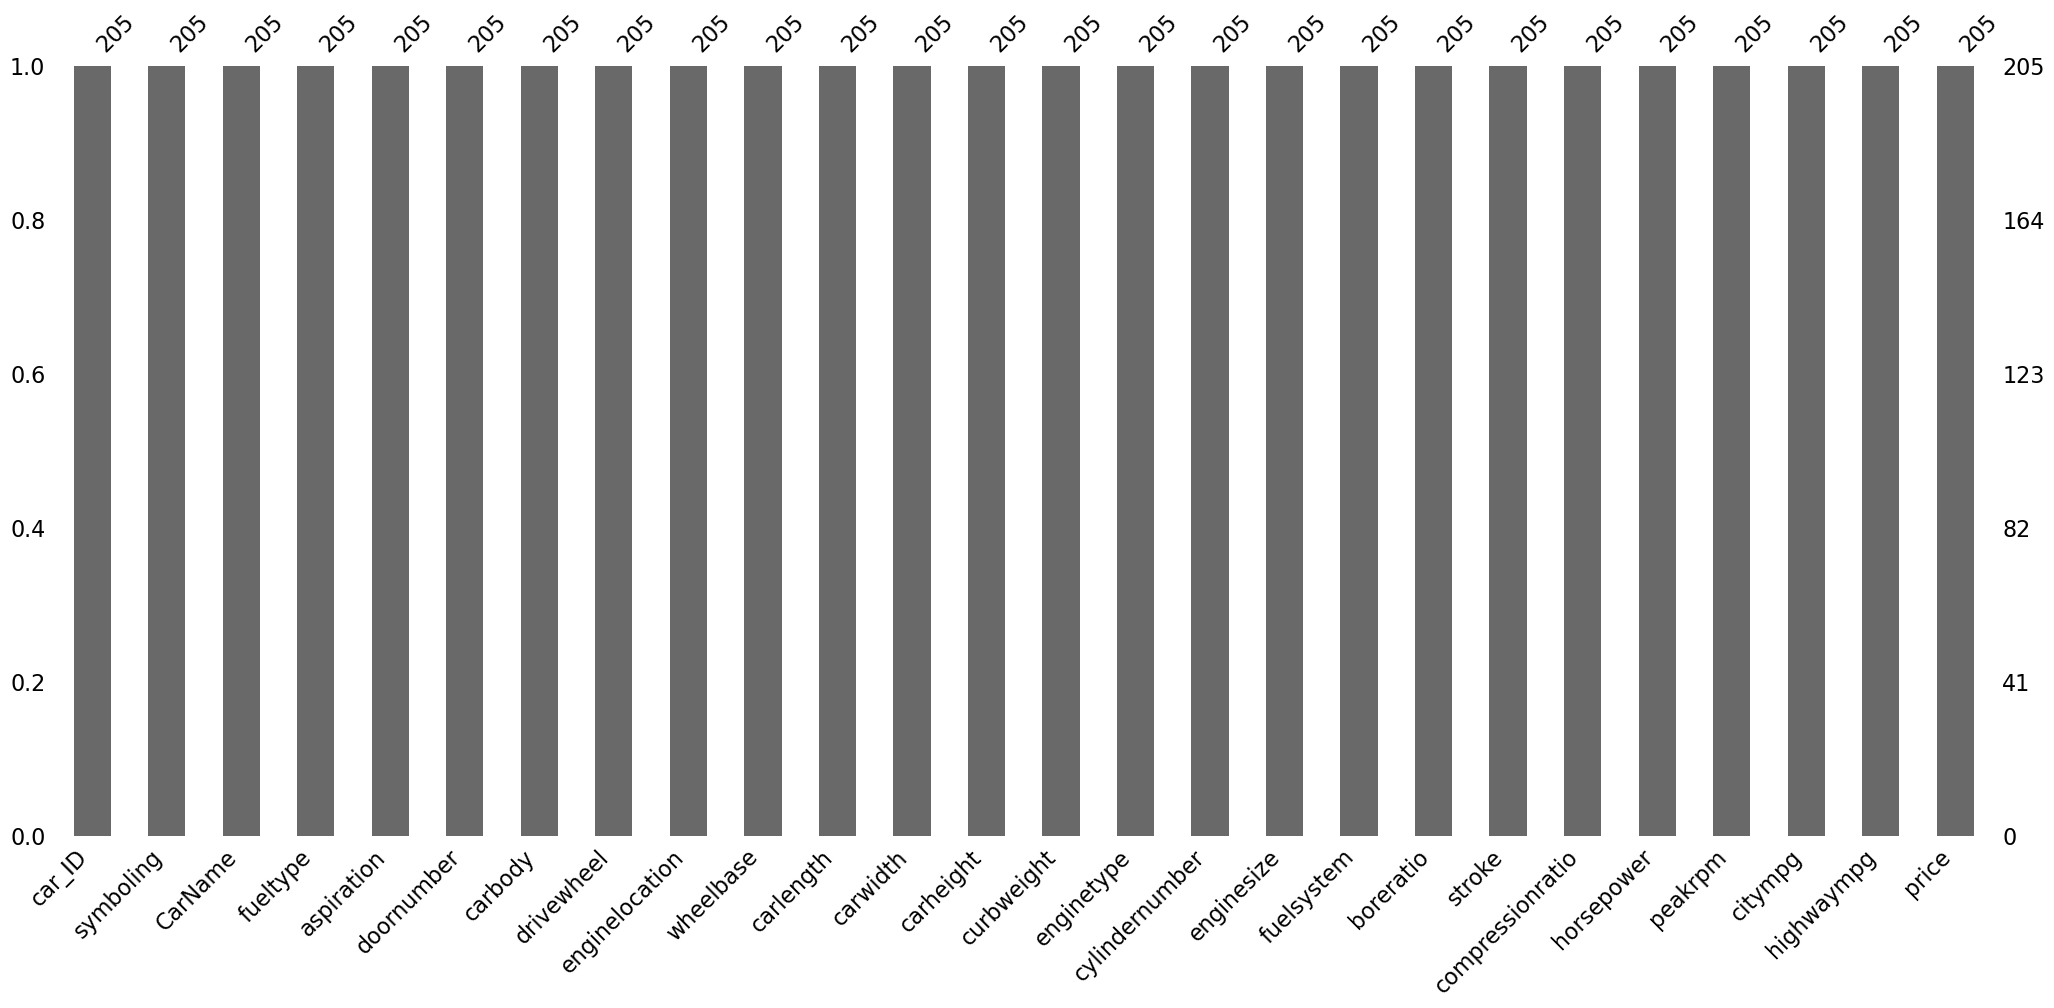

In [39]:
df = pd.read_csv('CarPrice_Assignment.csv')

# Display the first 5 rows of the data
display(df.head())
print('---' * 30)

# Display the last 5 rows of the data
display(df.tail())
print('---' * 30)

# Display the shape of the data
display(df.shape)
print(f'The data has {df.shape[0]} rows, and {df.shape[1]} columns.')
print('---' * 30)

# Checking the datatype of each column
display(df.dtypes)
print('---' * 30)

# Displau the numerical statistics of the dataset
display(df.describe())

# Display the categorical statistics of the dataset
display(df.describe(include='object'))
print('---' * 30)

# Checking for duplicates in the dataset
display(df.duplicated().sum())
print(f'The dataset has {df.duplicated().sum()} duplicates.')
print('---' * 30)

# Checking for missing values
display(df.isnull().sum())

# Visualizing missing values using missingno
import missingno as msno
plt.figure(figsize=(12,4))
msno.bar(df)

### Step 2: Data Wrangling/Cleaning

In [40]:
# Coverting all column title to lower case for consistency
df.columns = df.columns.str.lower()
df.columns

Index(['car_id', 'symboling', 'carname', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [41]:
# Dropping the car_id column as it has no significance on the dataset
df.drop(['car_id'], axis=1, inplace=True)
df.head()

symboling                   carname fueltype aspiration doornumber  \
0          3        alfa-romero giulia      gas        std        two   
1          3       alfa-romero stelvio      gas        std        two   
2          1  alfa-romero Quadrifoglio      gas        std        two   
3          2               audi 100 ls      gas        std       four   
4          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  ...  \
0  convertible        rwd          front       88.6      168.8  ...   
1  convertible        rwd          front       88.6      168.8  ...   
2    hatchback        rwd          front       94.5      171.2  ...   
3        sedan        fwd          front       99.8      176.6  ...   
4        sedan        4wd          front       99.4      176.6  ...   

   enginesize  fuelsystem  boreratio stroke compressionratio  horsepower  \
0         130        mpfi       3.47   2.68              9.0         111   
1         130        mpfi       3.47   2.68              9.0         111   
2         152        mpfi       2.68   3.47              9.0         154   
3         109        mpfi       3.19   3.40             10.0         102   
4         136        mpfi       3.19   3.40              8.0         115   

  peakrpm  citympg  highwaympg    price  
0    5000       21          27  13495.0  
1    5000       21          27  16500.0  
2    5000       19          26  16500.0  
3    5500       24          30  13950.0  
4    5500       18          22  17450.0  

[5 rows x 25 columns]

In [42]:
# Checking the unique numbers in each column
df.nunique()

symboling             6
carname             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [43]:
# Extracting a new column (car_brand) from the (carname) column for a better visualization
df['car_brand'] = df['carname'].str.split().str[0]

df['car_brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [44]:
# Fixing spellings in the car_brand column

df['car_brand'] = df['car_brand'].replace({'vw': 'volkswagen', 'vokswagen': 'volkswagen', 'toyouta': 'toyota', 'maxda': 'mazda', 'Nissan': 'nissan', 'porcshce': 'porsche'})
df['car_brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [45]:
df.head()

symboling                   carname fueltype aspiration doornumber  \
0          3        alfa-romero giulia      gas        std        two   
1          3       alfa-romero stelvio      gas        std        two   
2          1  alfa-romero Quadrifoglio      gas        std        two   
3          2               audi 100 ls      gas        std       four   
4          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  ...  \
0  convertible        rwd          front       88.6      168.8  ...   
1  convertible        rwd          front       88.6      168.8  ...   
2    hatchback        rwd          front       94.5      171.2  ...   
3        sedan        fwd          front       99.8      176.6  ...   
4        sedan        4wd          front       99.4      176.6  ...   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price    car_brand  
0          27  13495.0  alfa-romero  
1          27  16500.0  alfa-romero  
2          26  16500.0  alfa-romero  
3          30  13950.0         audi  
4          22  17450.0         audi  

[5 rows x 26 columns]

In [46]:
# Dropping the carname column from the dataset
df.drop(['carname'], axis=1, inplace=True)
display(df.head())

symboling fueltype aspiration doornumber      carbody drivewheel  \
0          3      gas        std        two  convertible        rwd   
1          3      gas        std        two  convertible        rwd   
2          1      gas        std        two    hatchback        rwd   
3          2      gas        std       four        sedan        fwd   
4          2      gas        std       four        sedan        4wd   

  enginelocation  wheelbase  carlength  carwidth  ...  fuelsystem  boreratio  \
0          front       88.6      168.8      64.1  ...        mpfi       3.47   
1          front       88.6      168.8      64.1  ...        mpfi       3.47   
2          front       94.5      171.2      65.5  ...        mpfi       2.68   
3          front       99.8      176.6      66.2  ...        mpfi       3.19   
4          front       99.4      176.6      66.4  ...        mpfi       3.19   

  stroke compressionratio  horsepower peakrpm  citympg  highwaympg    price  \
0   2.68              9.0         111    5000       21          27  13495.0   
1   2.68              9.0         111    5000       21          27  16500.0   
2   3.47              9.0         154    5000       19          26  16500.0   
3   3.40             10.0         102    5500       24          30  13950.0   
4   3.40              8.0         115    5500       18          22  17450.0   

     car_brand  
0  alfa-romero  
1  alfa-romero  
2  alfa-romero  
3         audi  
4         audi  

[5 rows x 25 columns]

### Step 3: EDA

### 
- Univariate Analysis

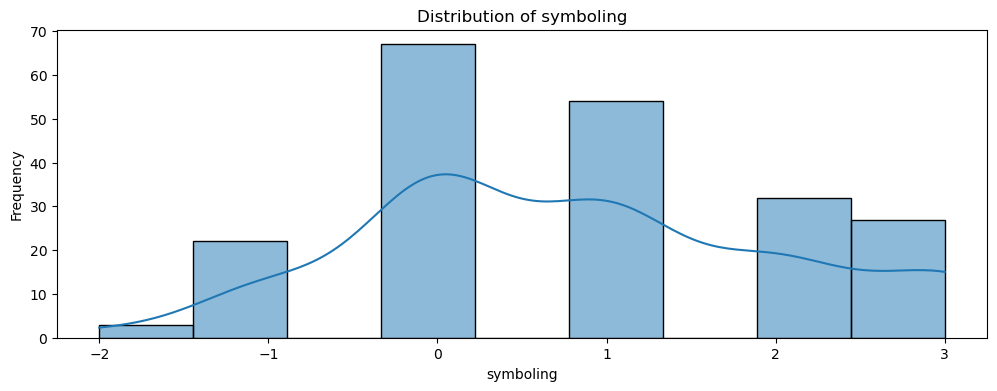

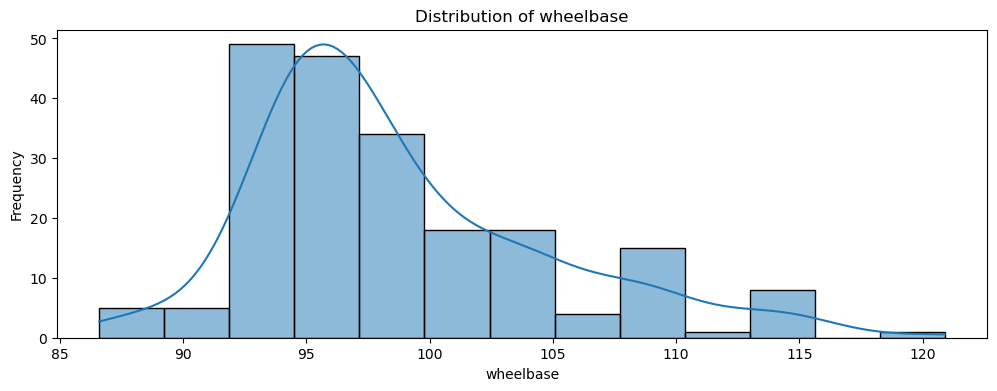

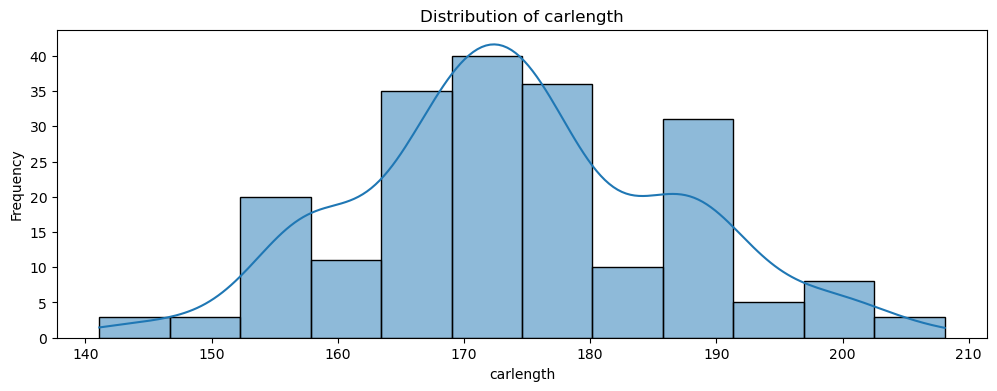

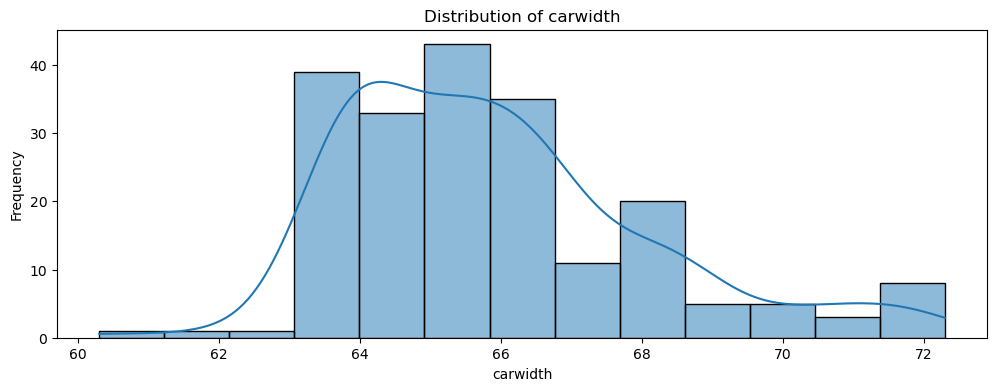

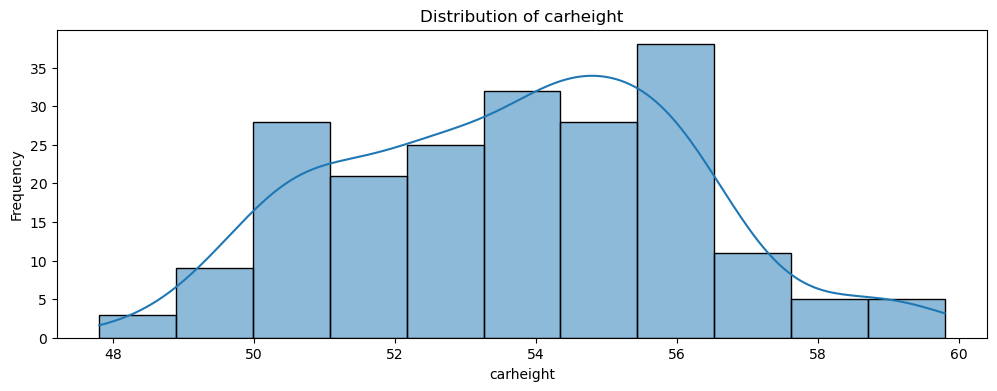

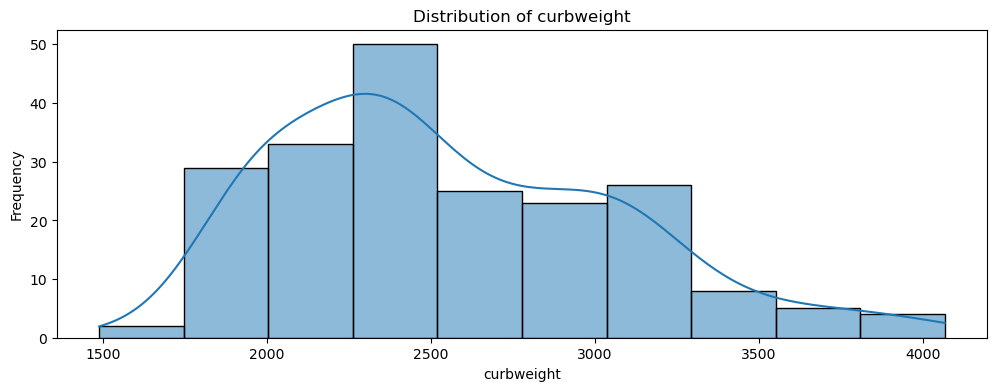

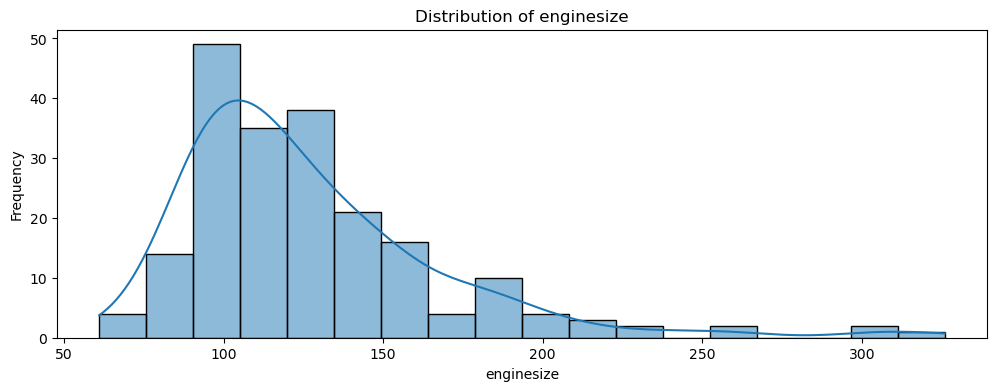

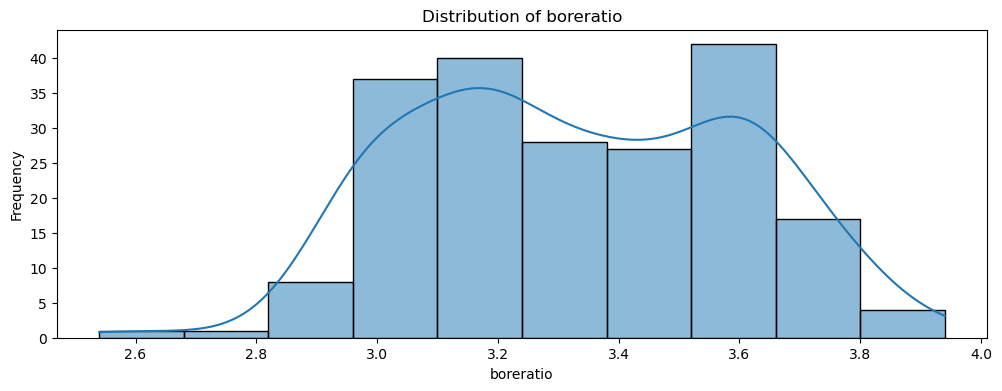

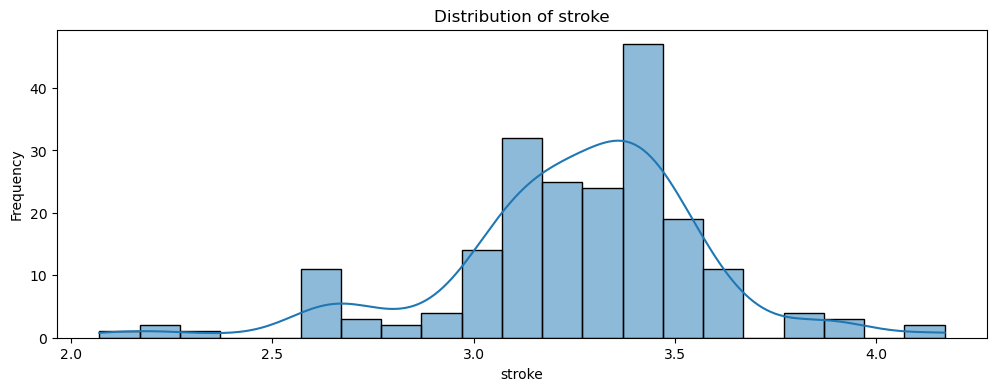

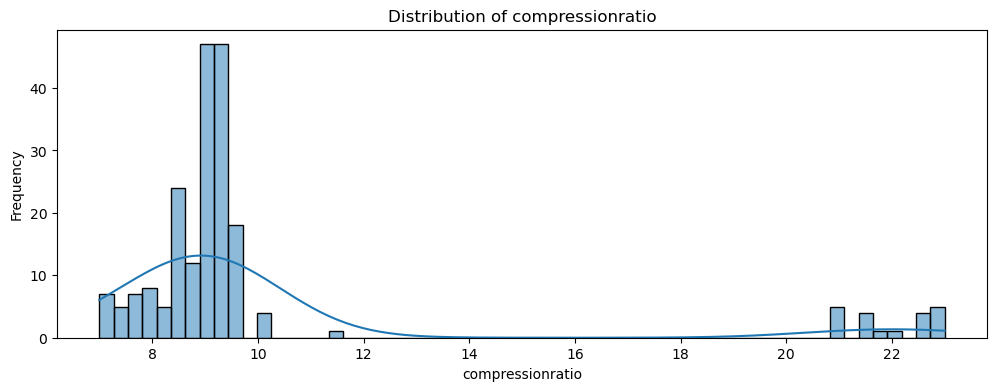

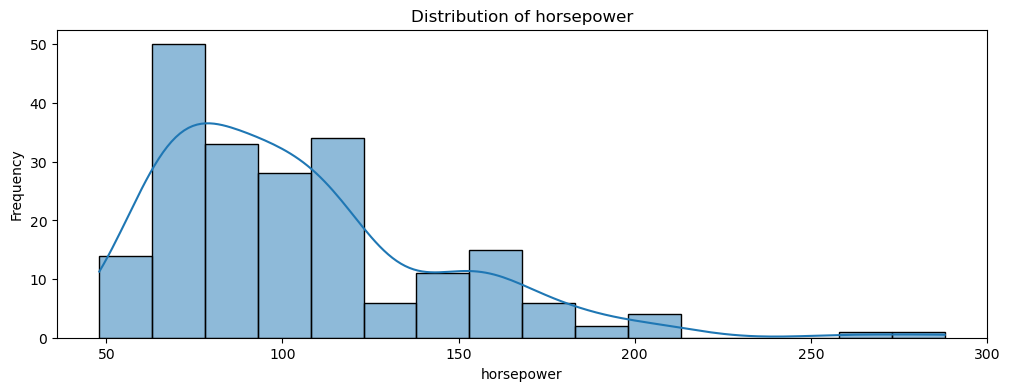

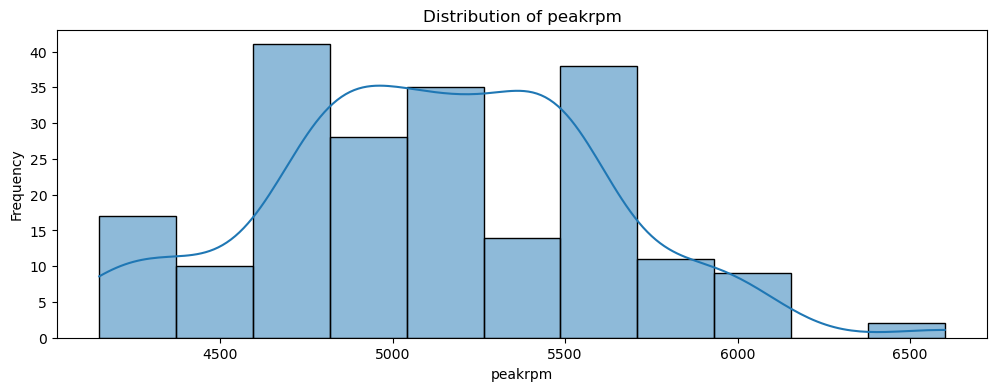

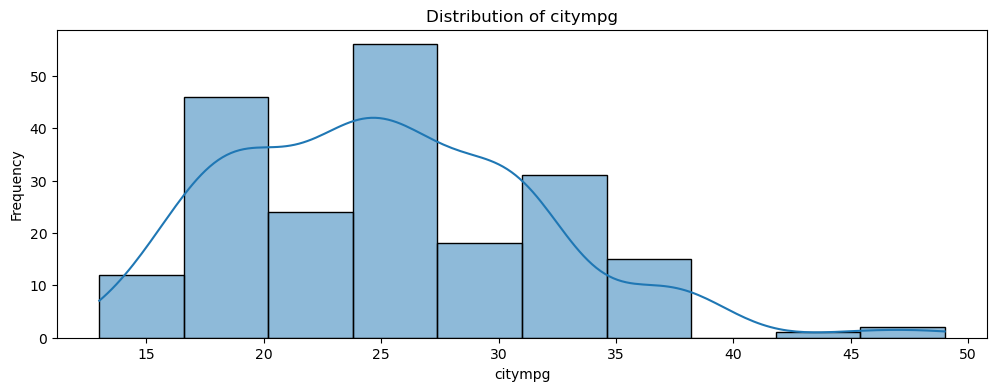

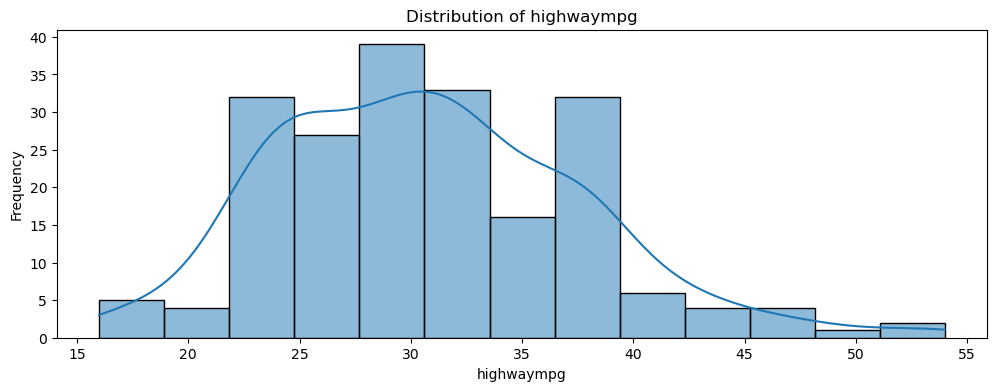

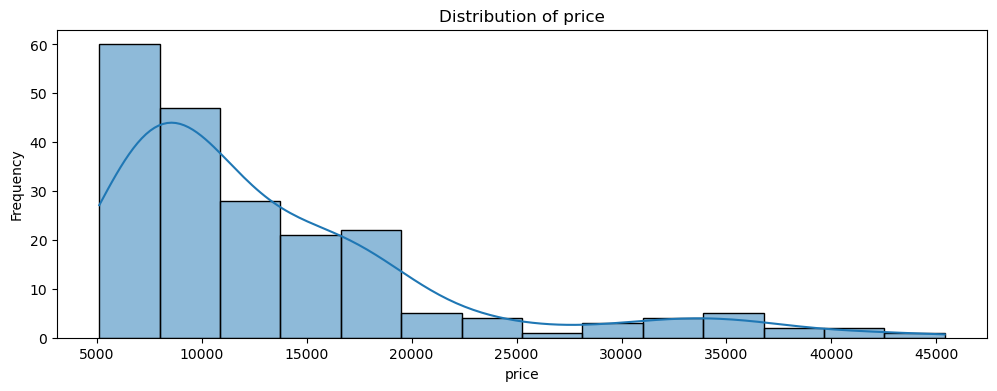

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


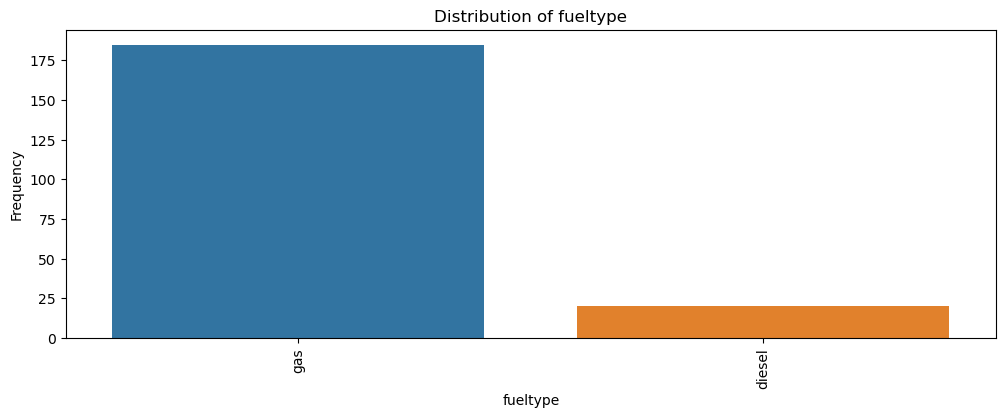

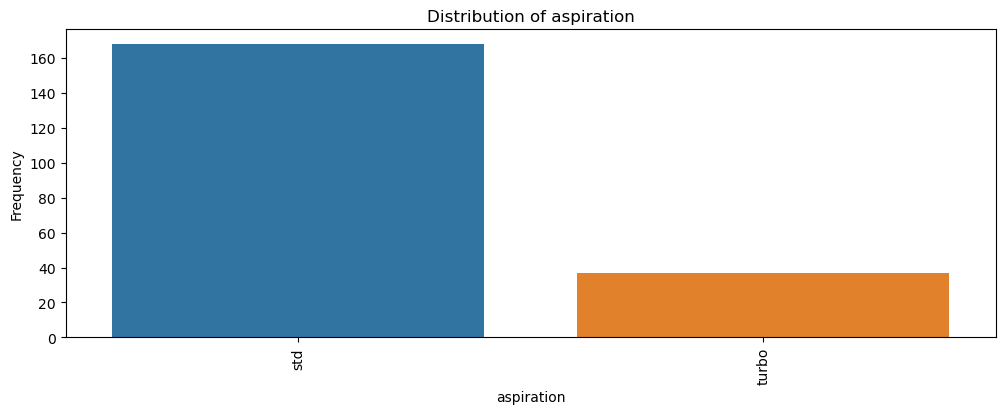

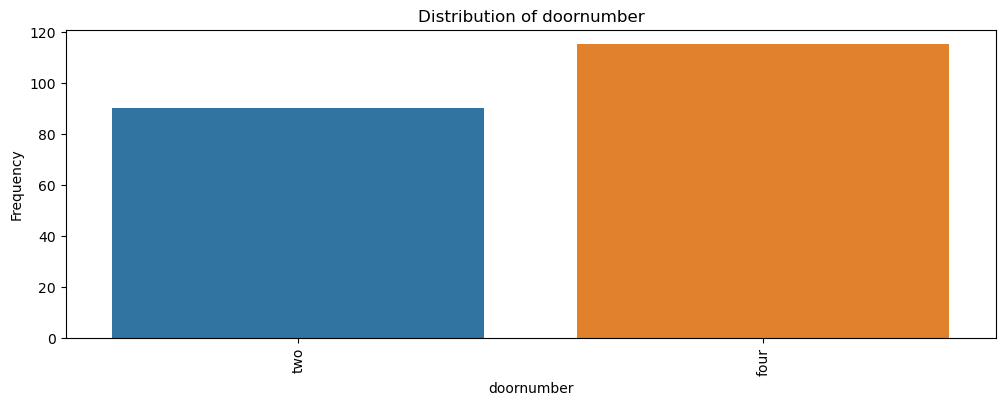

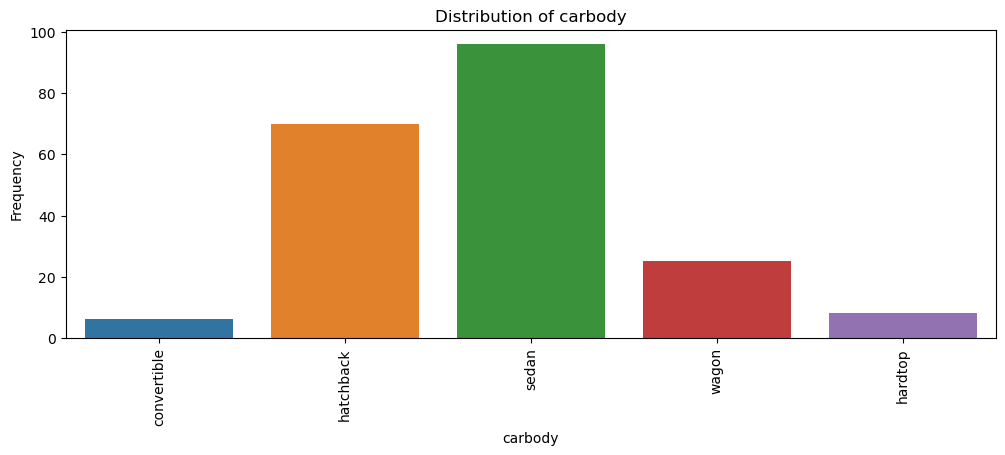

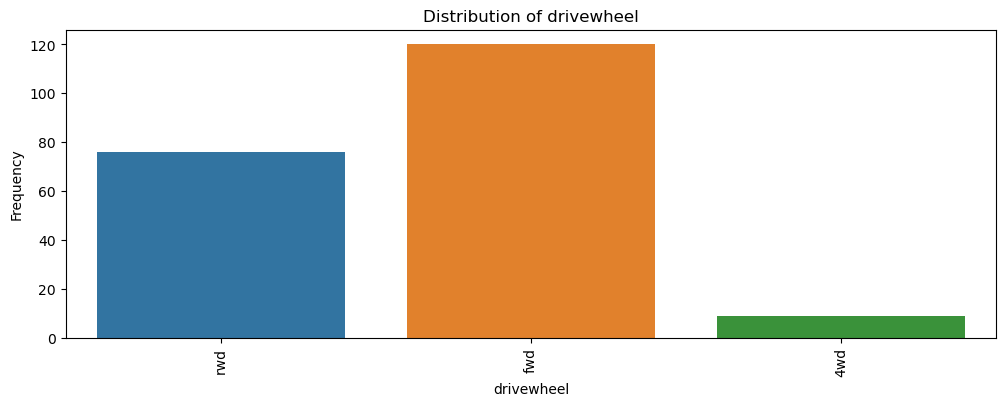

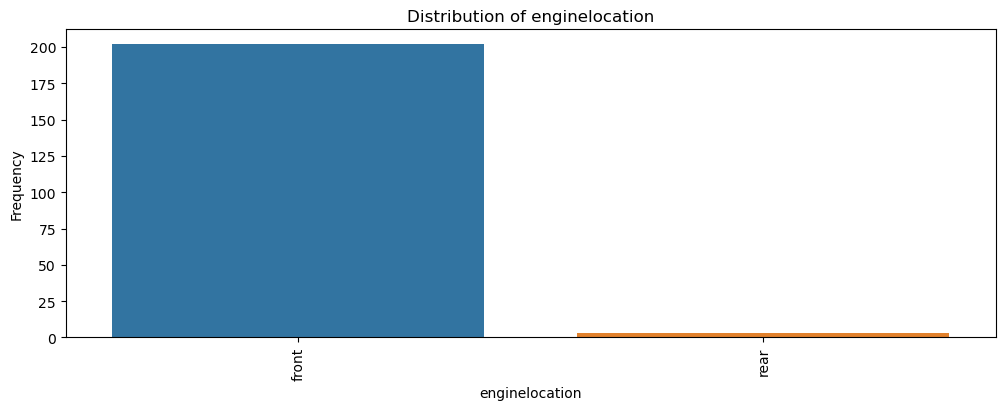

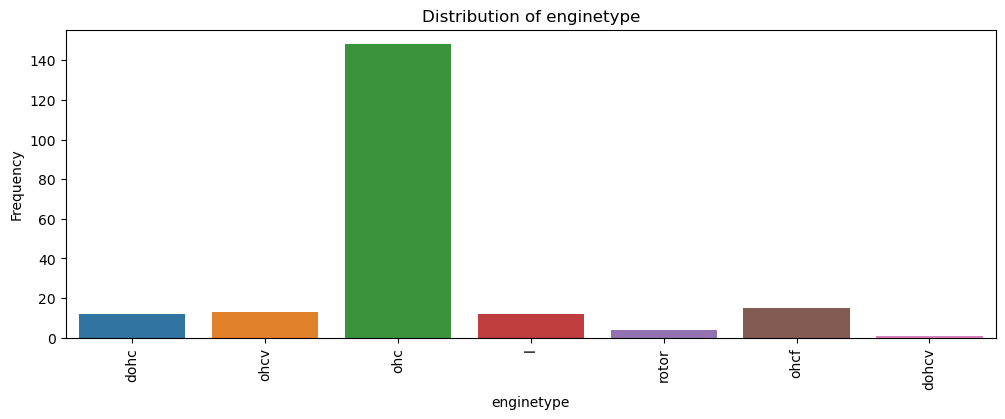

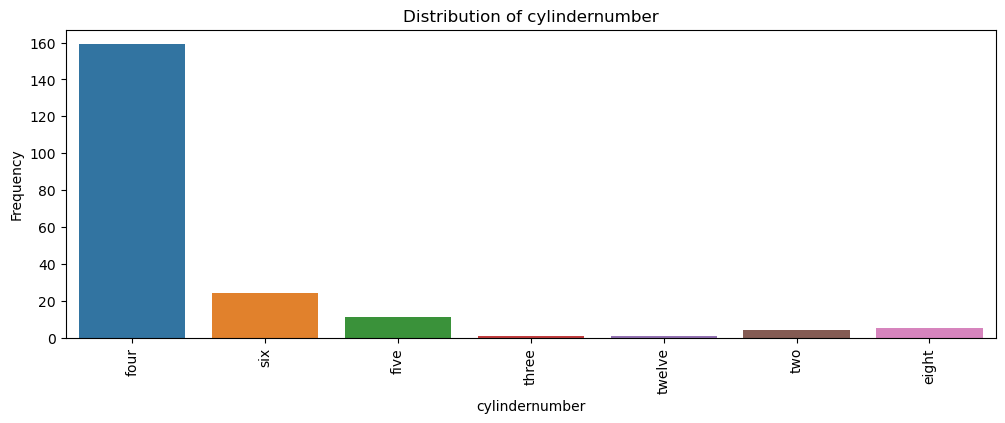

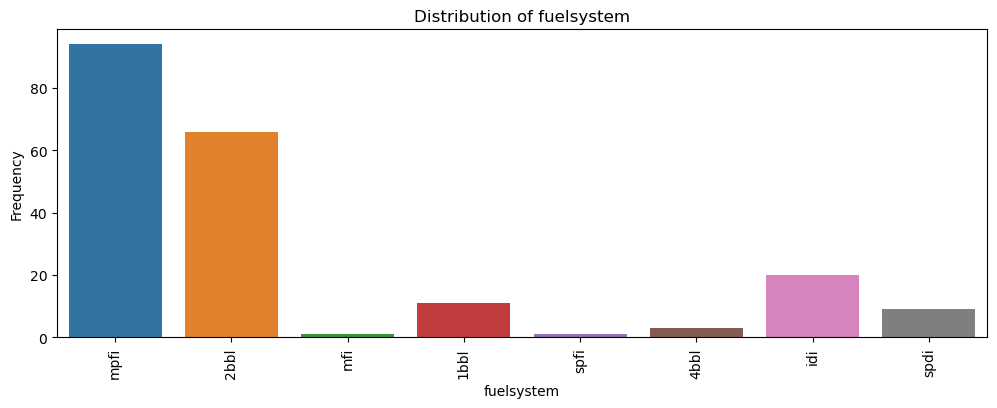

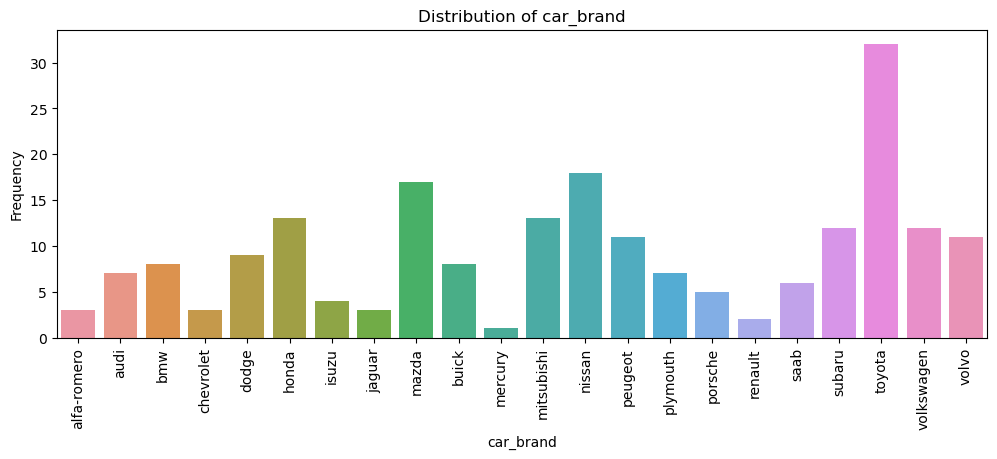

In [47]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
for i in numerical_columns:
    plt.figure(figsize=(12,4))
    sns.histplot(df[i], kde=True)
    plt.title(f'Distribution of {i}')
    plt.xlabel(f'{i}')
    plt.ylabel('Frequency')
    plt.show()
print('---' * 70)

categorical_columns = df.select_dtypes(include=['object']).columns
for i in categorical_columns:
    plt.figure(figsize=(12,4))
    sns.countplot(df[i])
    plt.title(f'Distribution of {i}')
    plt.xlabel(f'{i}')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)

###
- Checking outliers

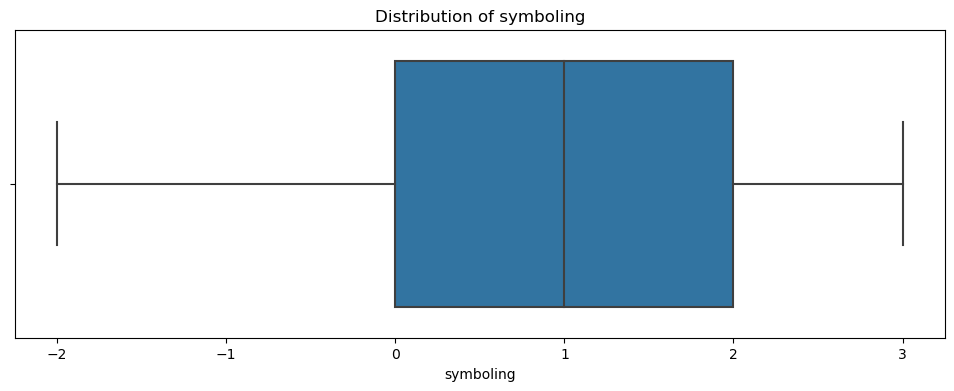

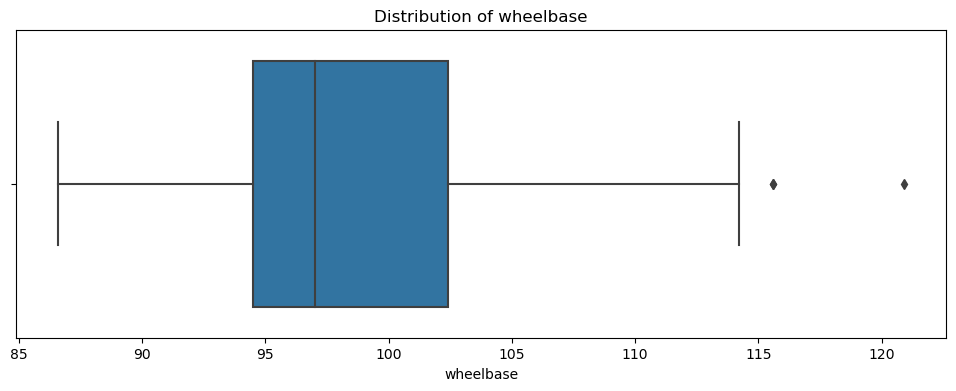

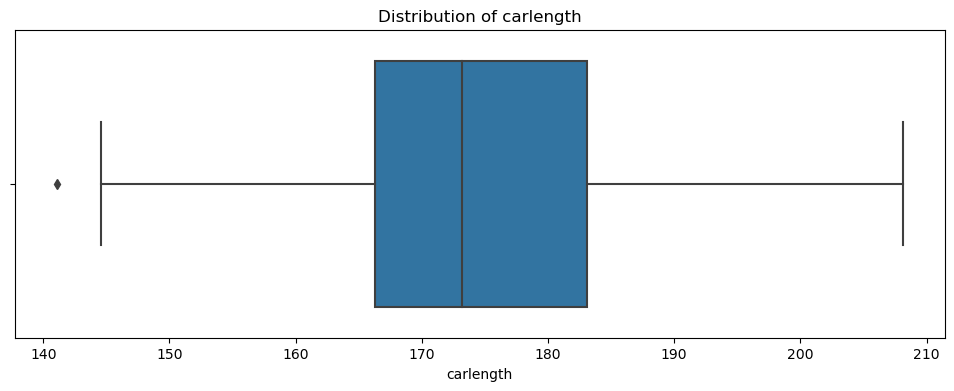

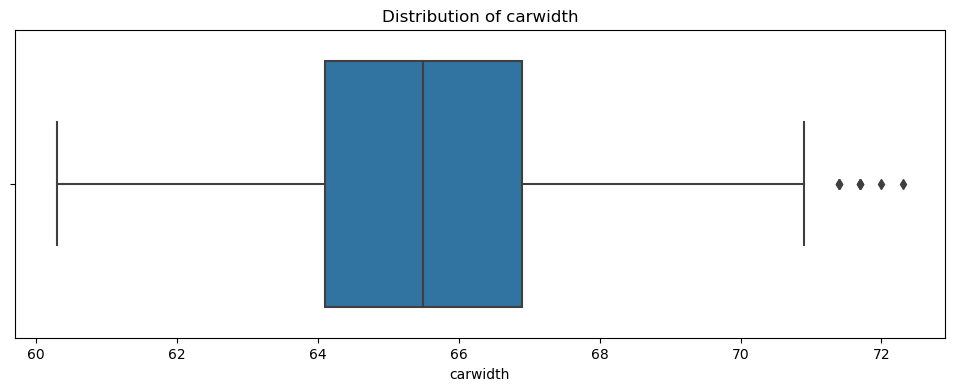

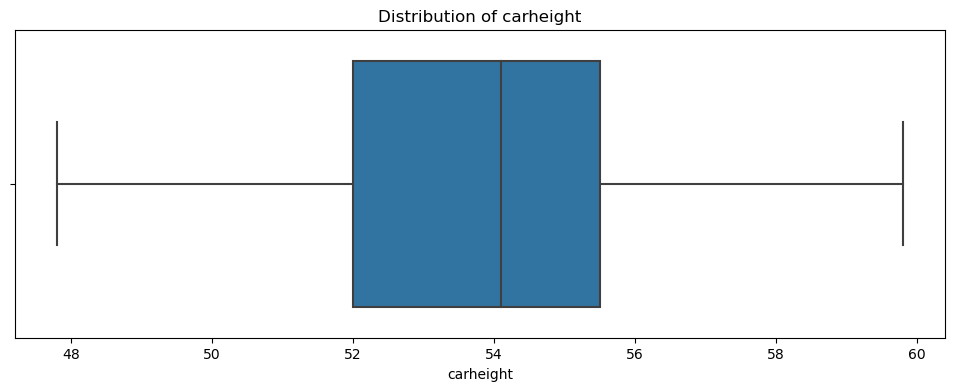

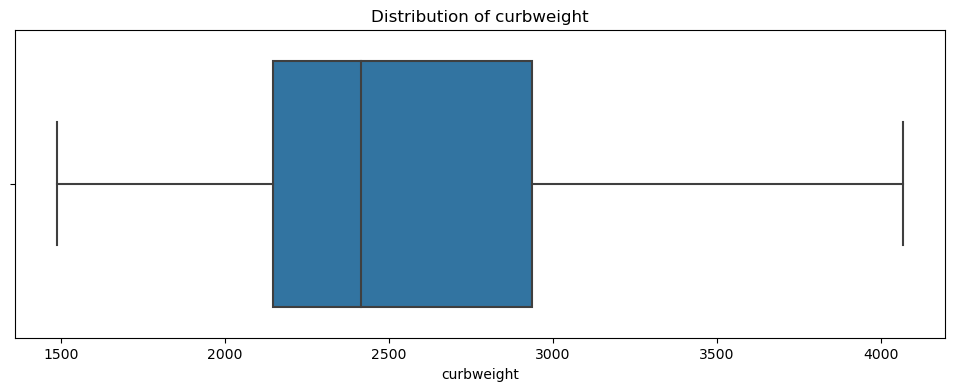

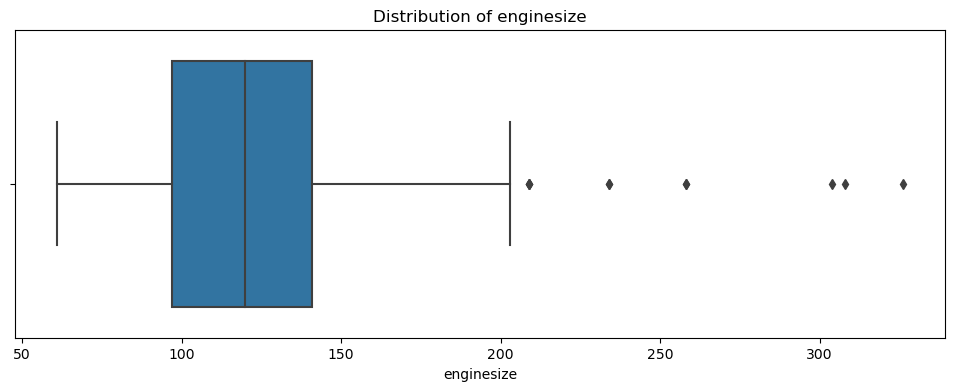

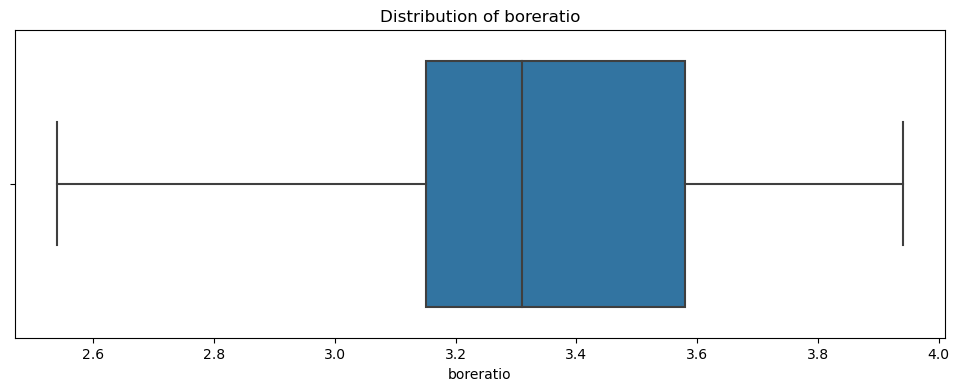

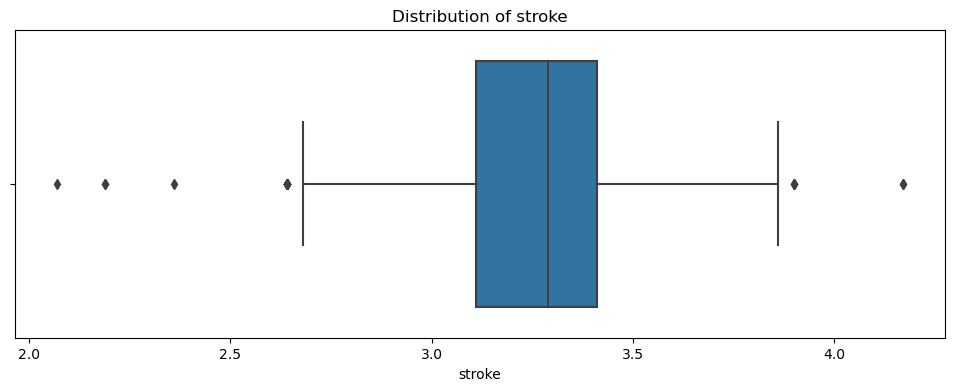

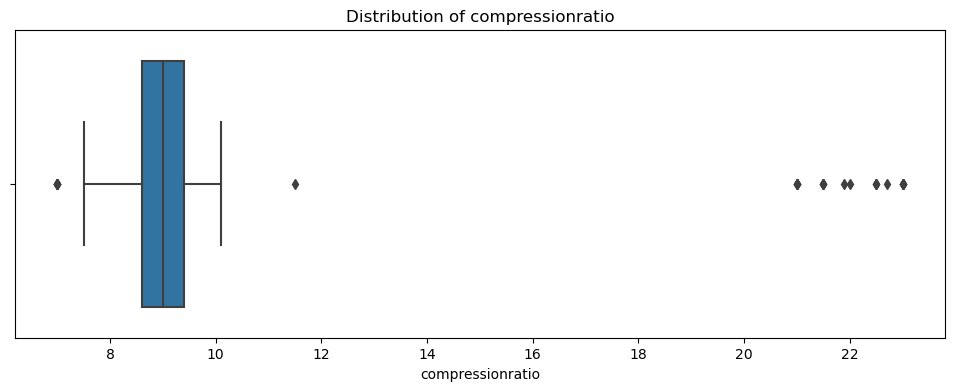

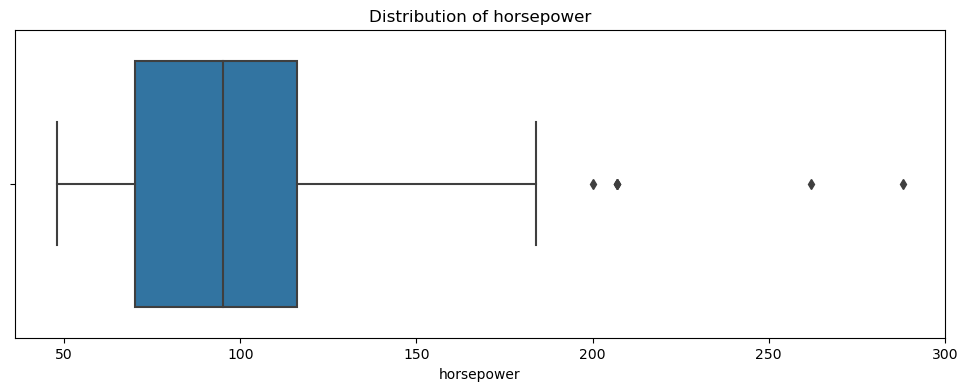

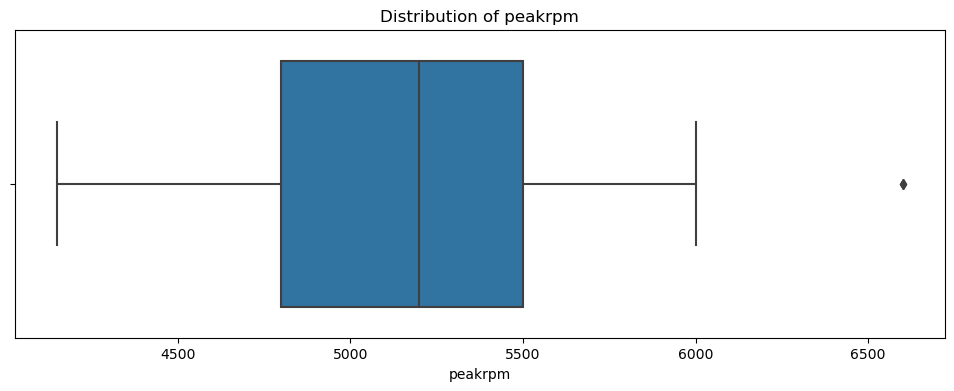

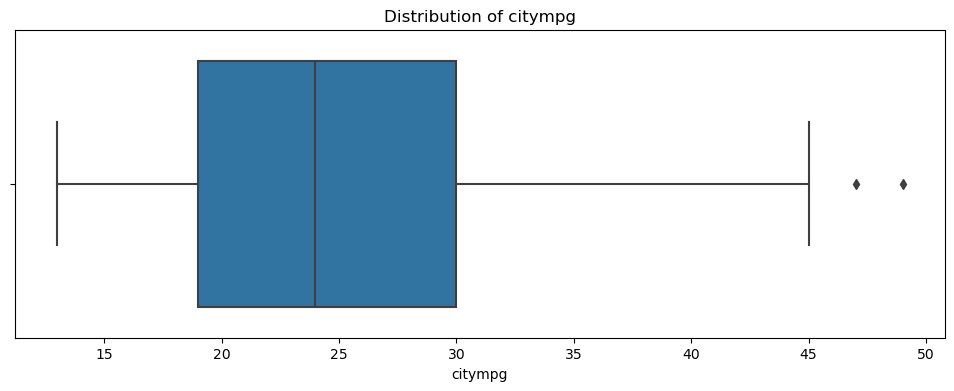

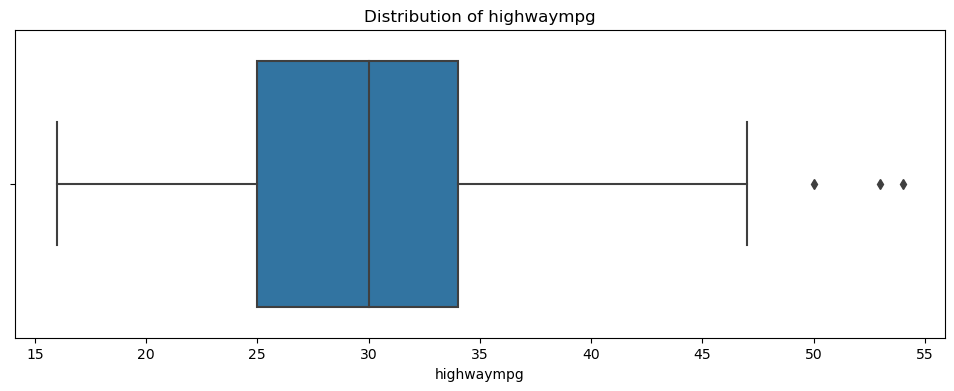

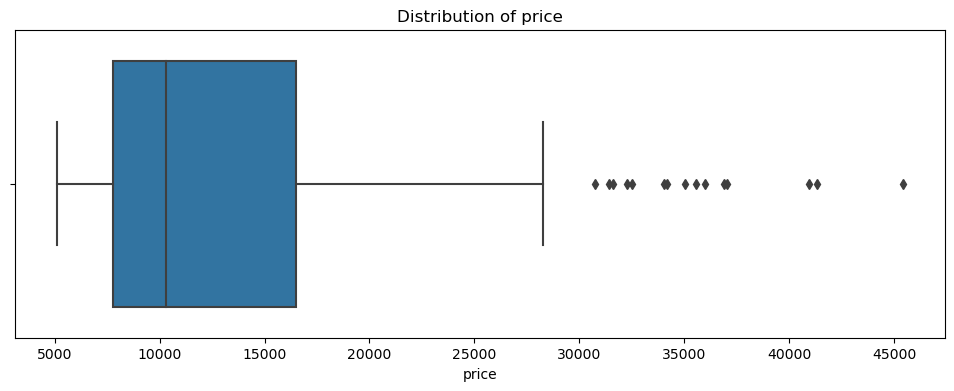

In [61]:
# Displaying the outliers in each numerical column
for i in numerical_columns:
    plt.figure(figsize=(12,4))
    sns.boxplot(df[i])
    plt.title(f'Distribution of {i}')

In [64]:
# Checking for outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 =df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the dataframe to remove outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [66]:
# Removing outliers from the each feature
df_cleaned = remove_outliers(df, 'wheelbase')
df_cleaned = remove_outliers(df, 'enginesize')
df_cleaned = remove_outliers(df, 'compressionratio')
df_cleaned = remove_outliers(df, 'carwidth')
df_cleaned = remove_outliers(df, 'carlength')
df_cleaned = remove_outliers(df, 'citympg')
df_cleaned = remove_outliers(df, 'highwaympg')
df_cleaned = remove_outliers(df, 'horsepower')
df_cleaned = remove_outliers(df, 'peakrpm')
df_cleaned = remove_outliers(df, 'stroke')
df_cleaned = remove_outliers(df, 'price')

In [72]:
# Display the shape before and after removing the outliers
print('original dataset shape:', df.shape)
print('cleaned dataset shape:', df_cleaned.shape)

original dataset shape: (205, 25)
cleaned dataset shape: (190, 25)


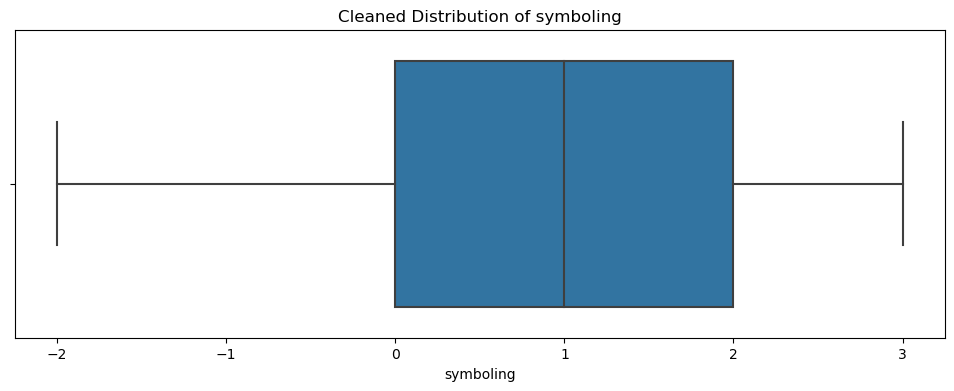

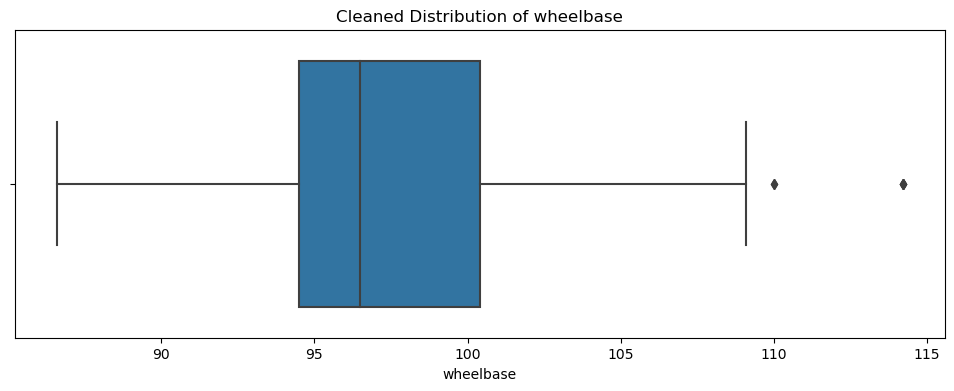

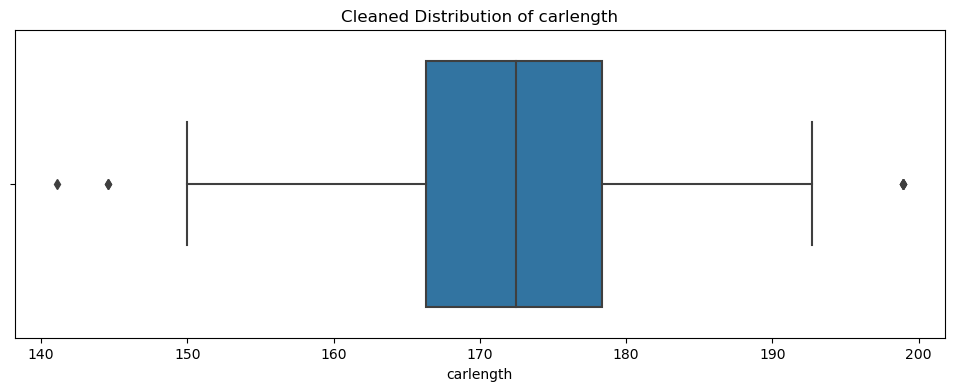

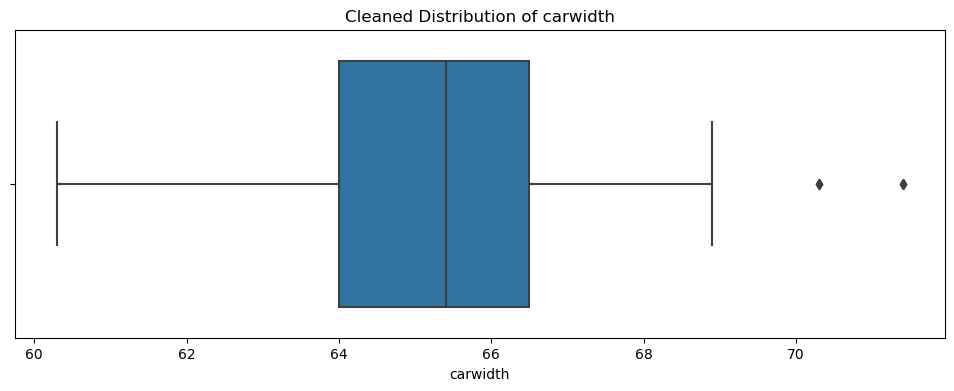

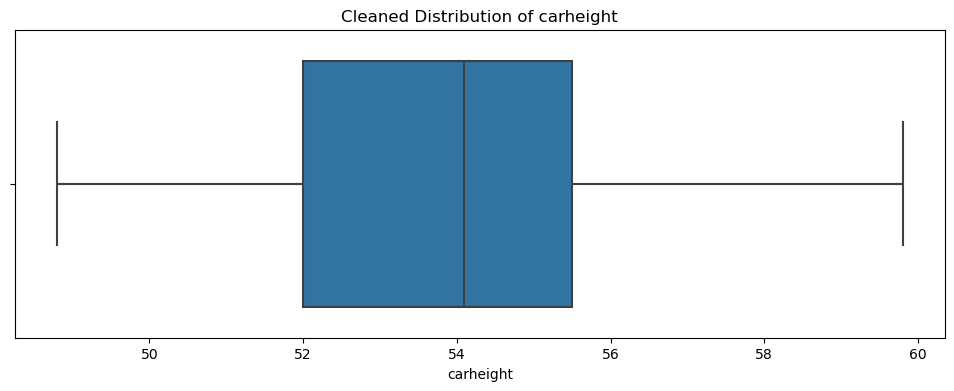

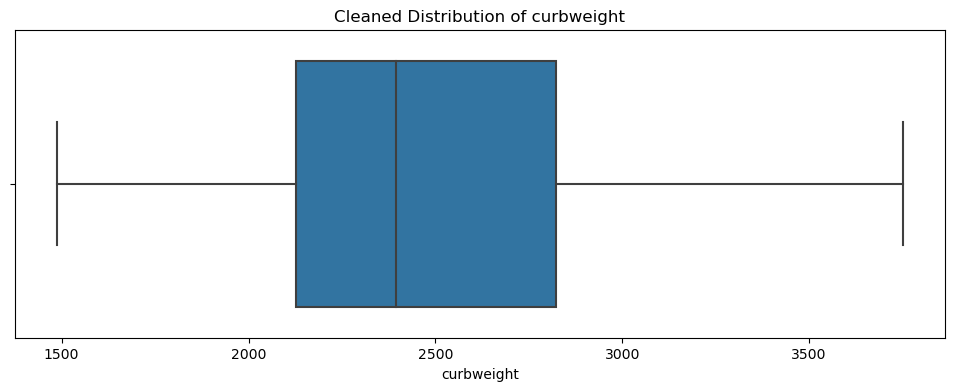

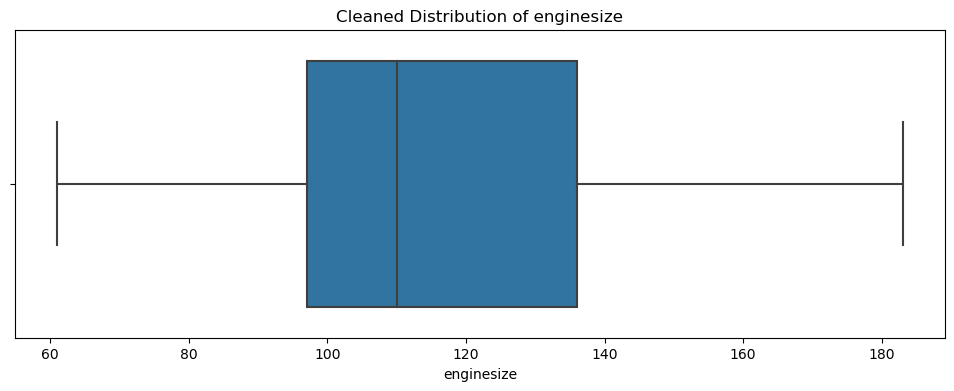

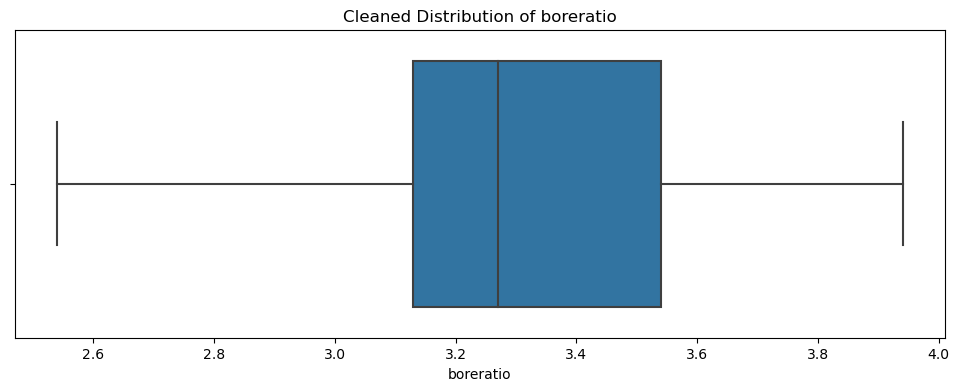

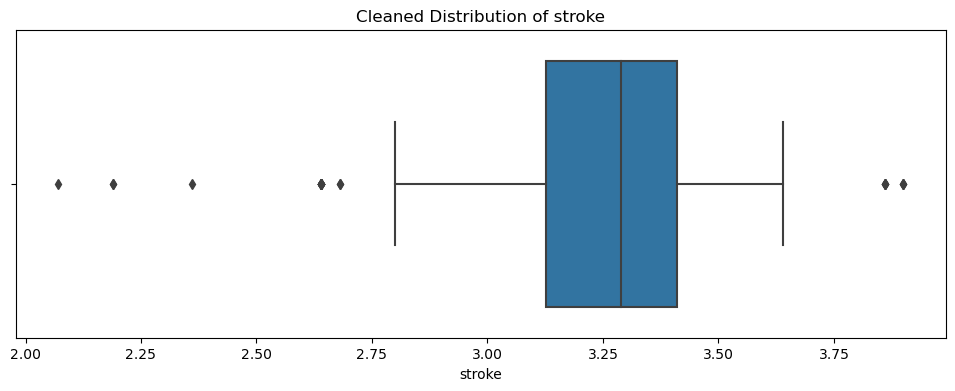

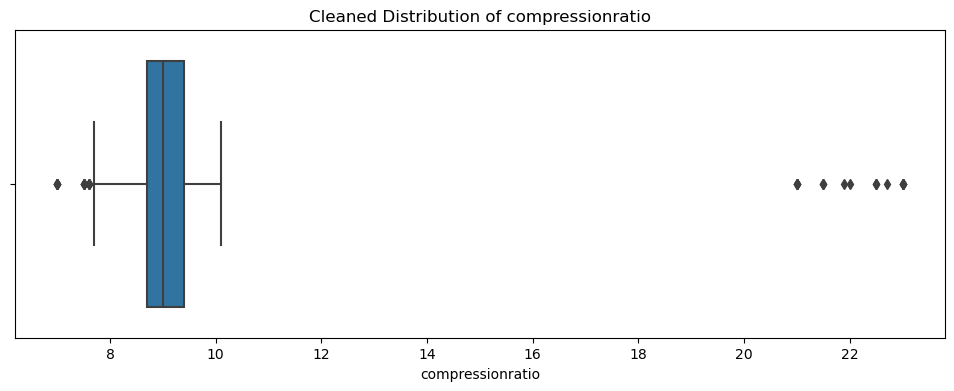

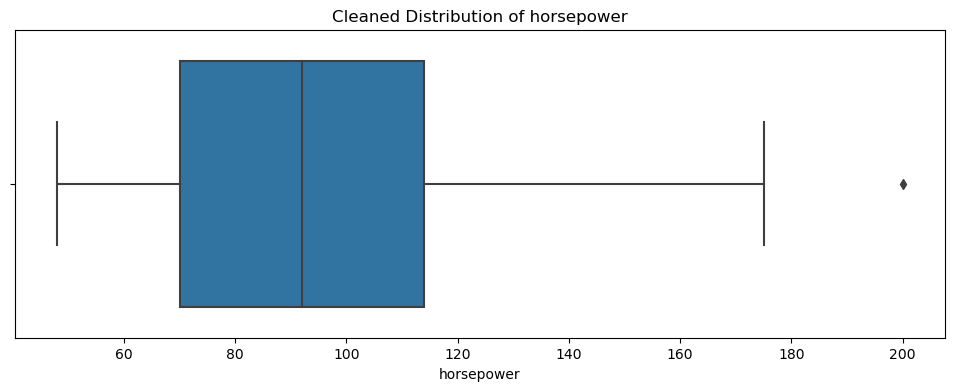

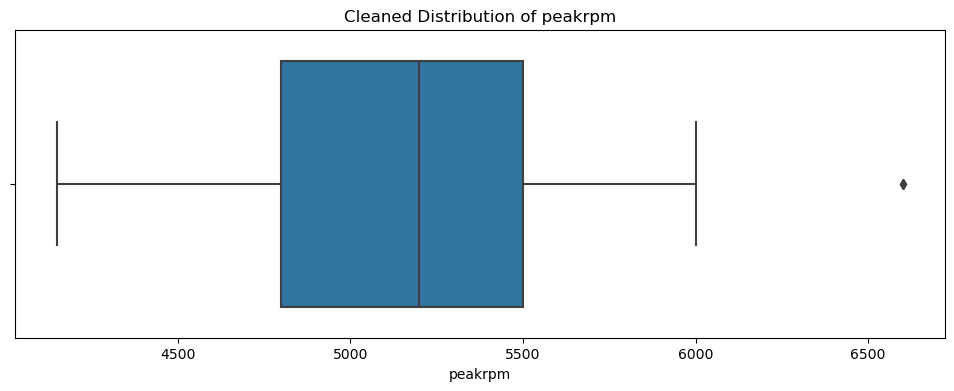

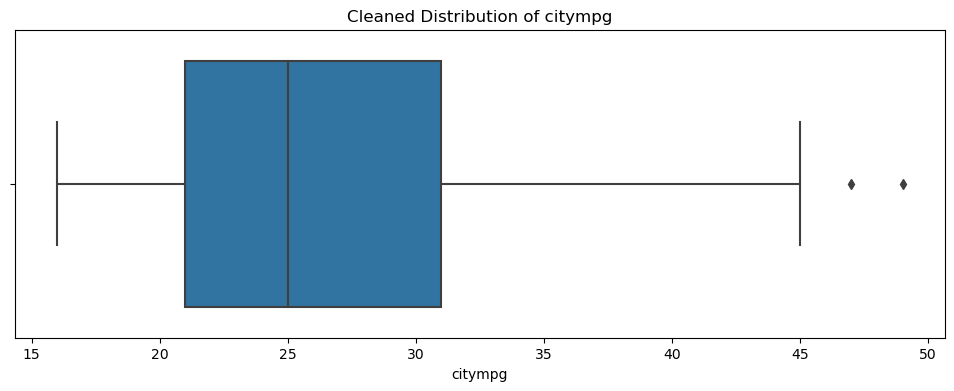

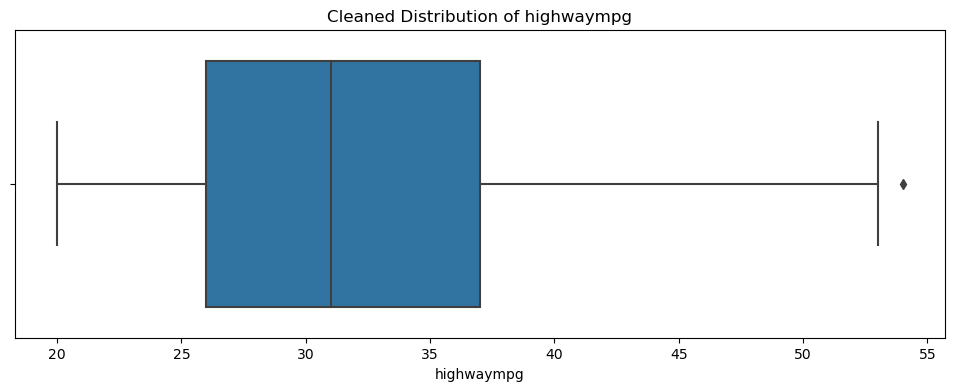

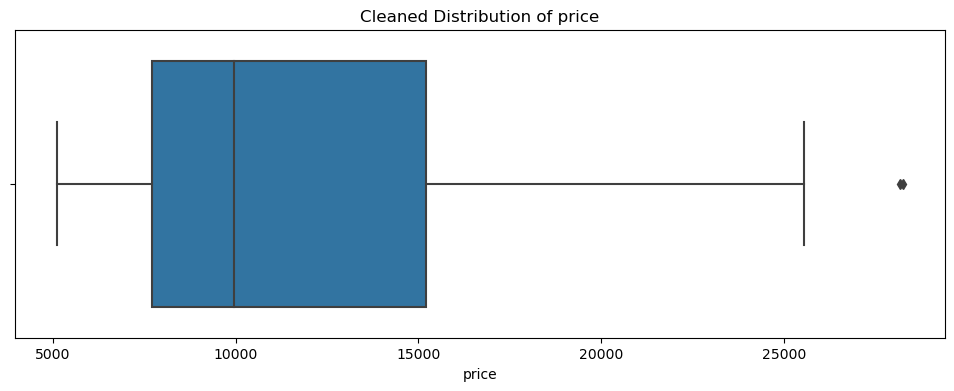

In [73]:
numerical_columns_cleaned = df_cleaned.select_dtypes(exclude='object')
for i in numerical_columns:
    plt.figure(figsize=(12,4))
    sns.boxplot(df_cleaned[i])
    plt.title(f'Cleaned Distribution of {i}')

###
- Bivariate Analysis

<Figure size 1500x900 with 0 Axes>

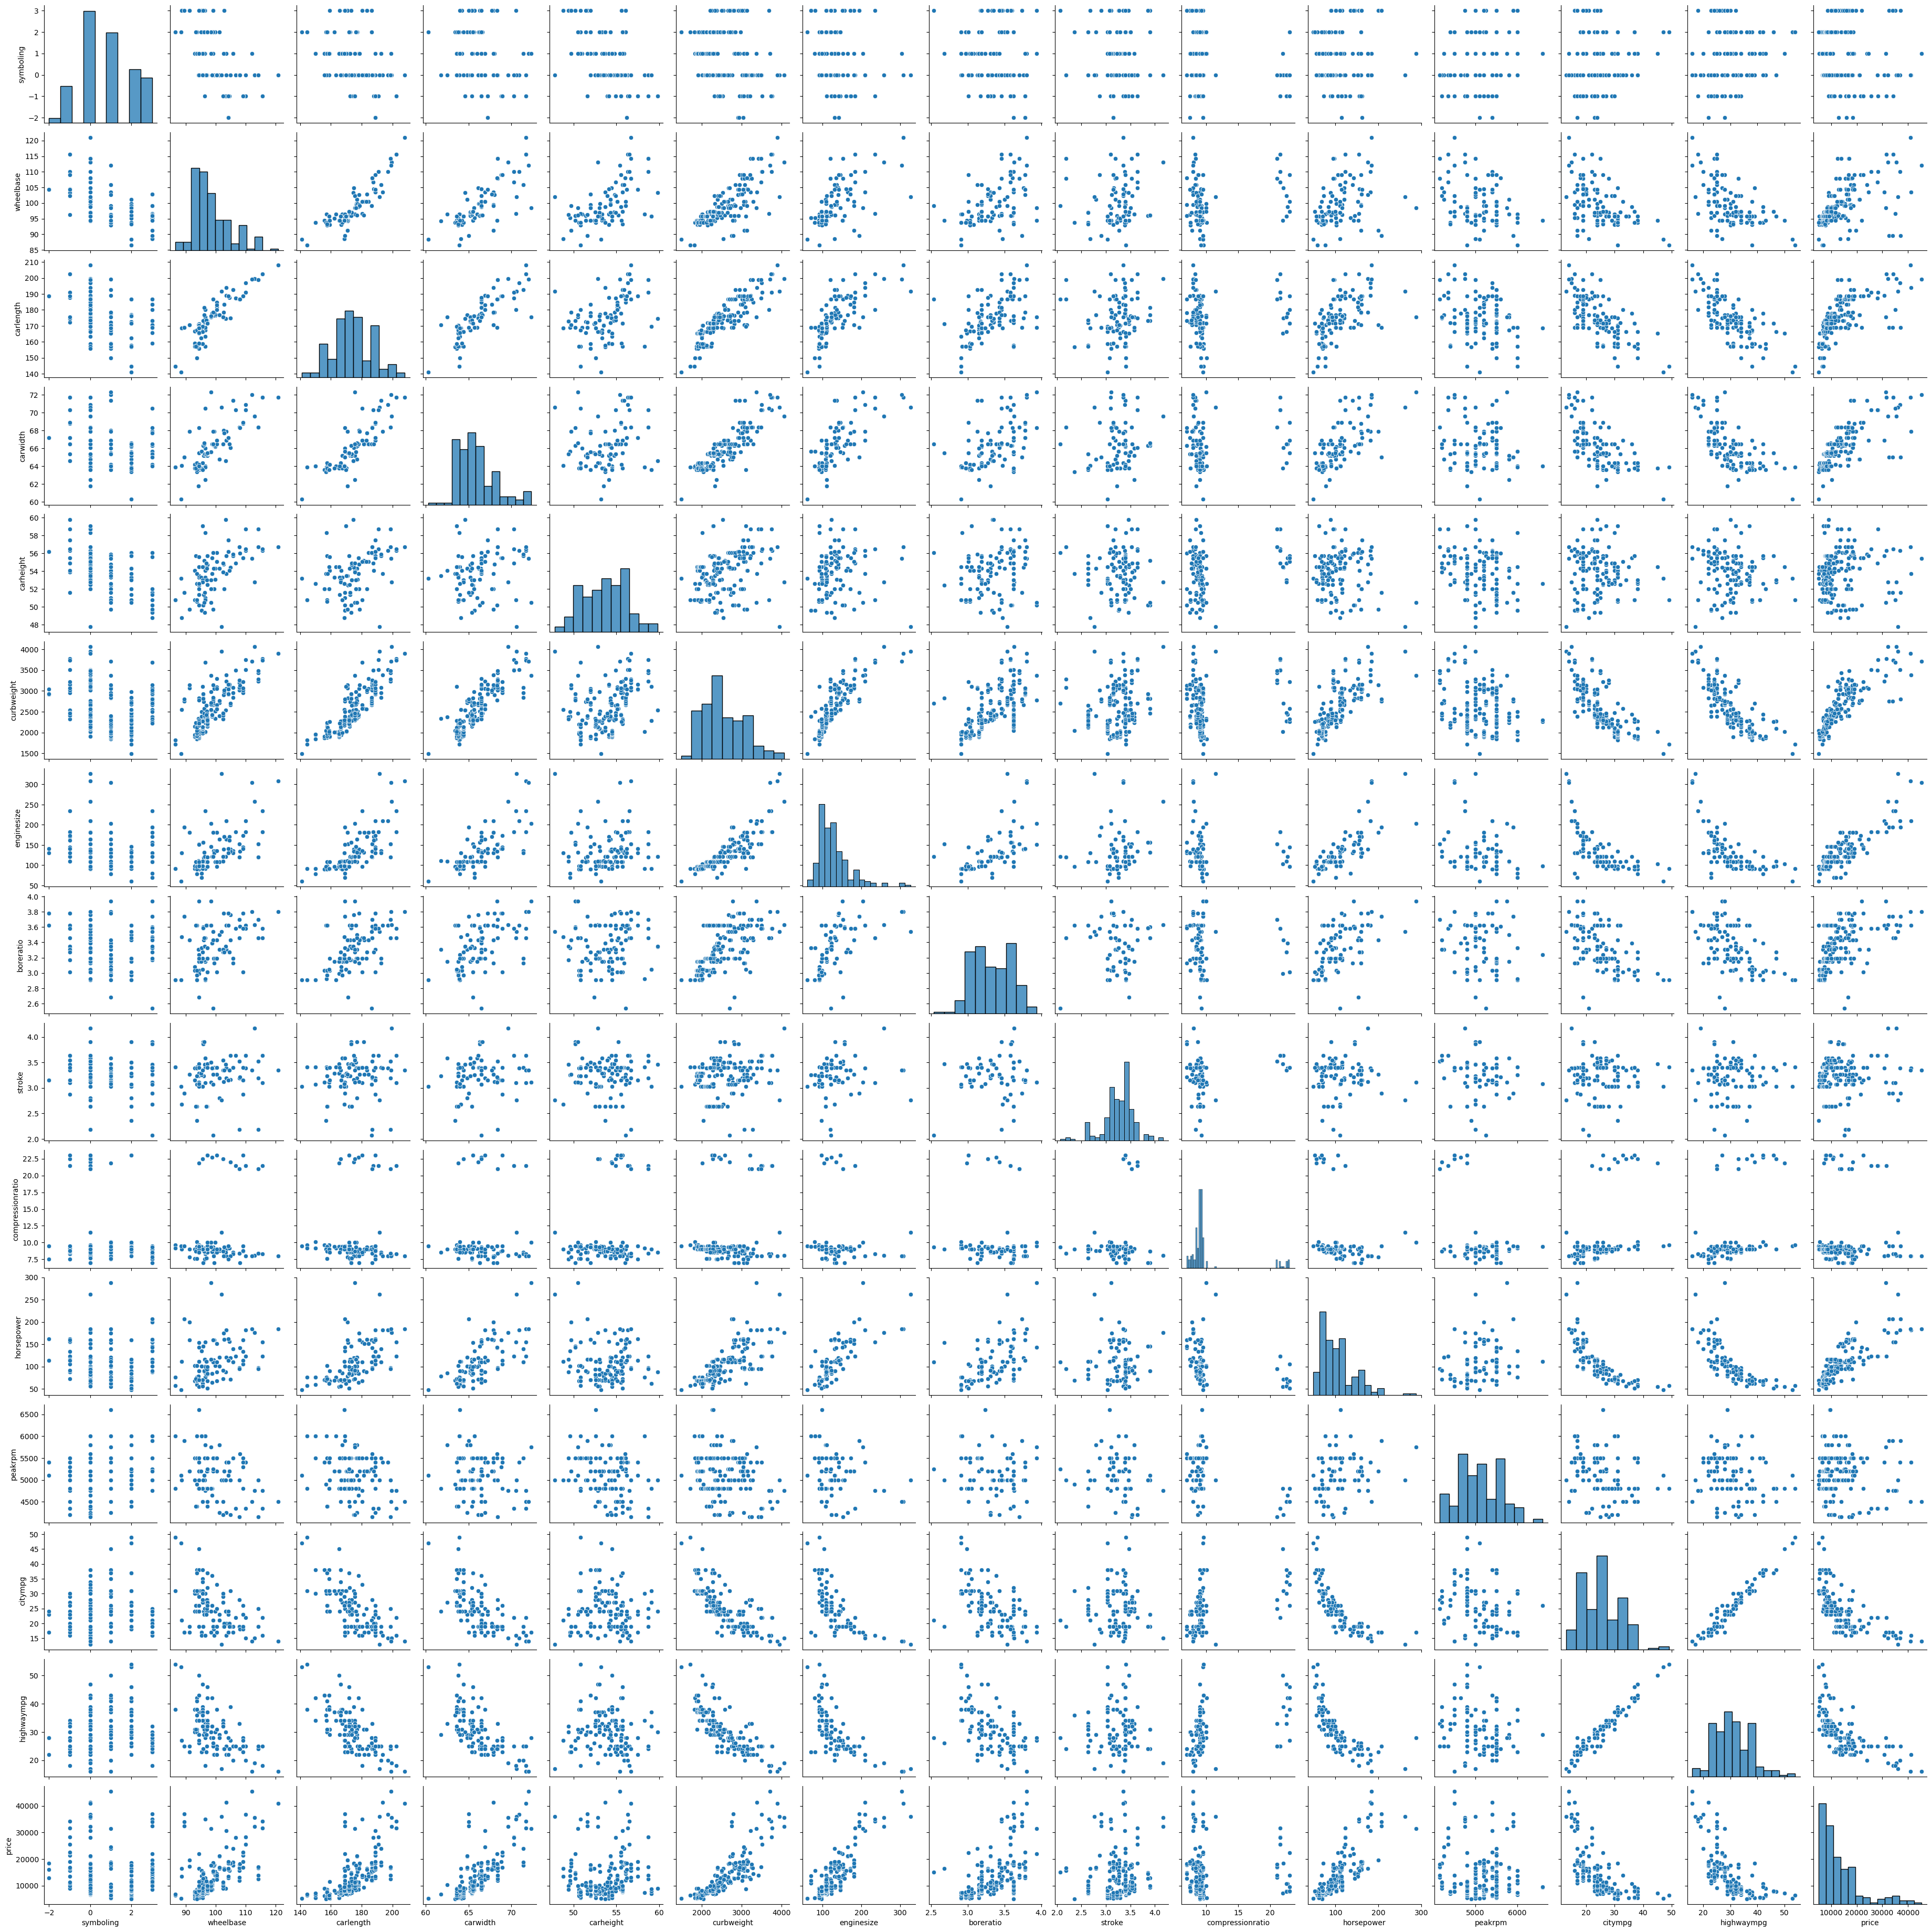

In [53]:
# Checking the spread of the data
plt.figure(figsize=(15,9))
sns.pairplot(df)

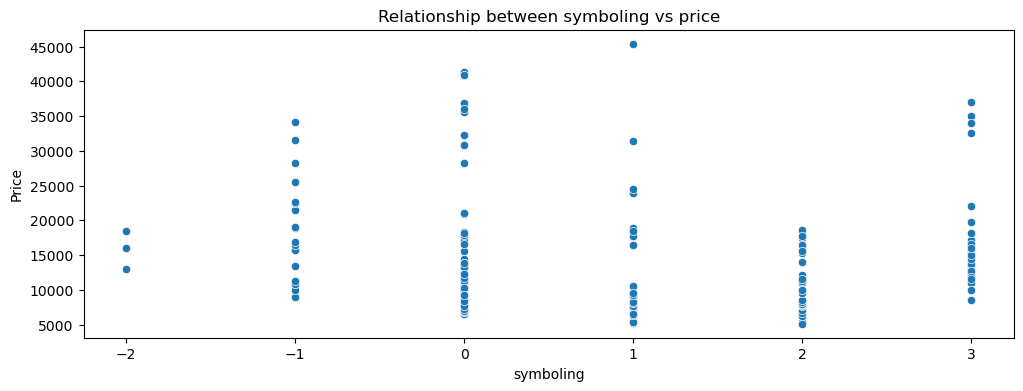

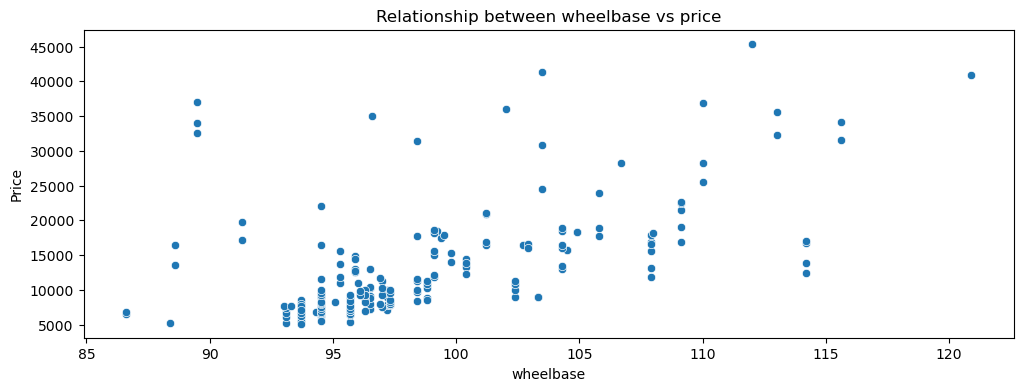

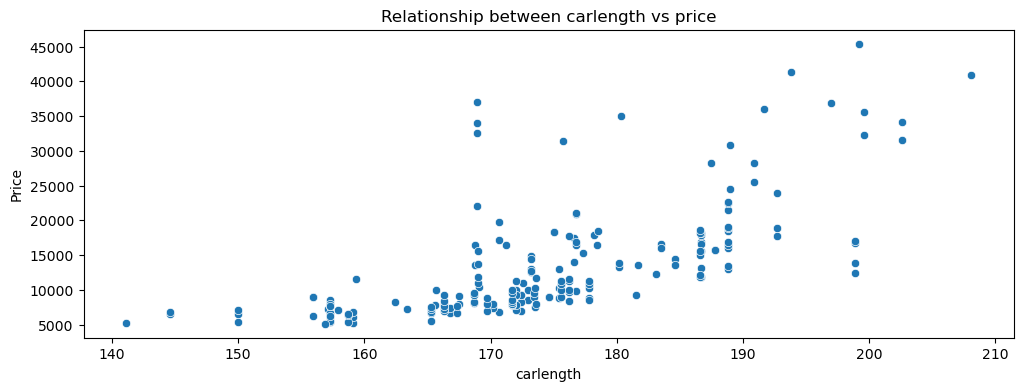

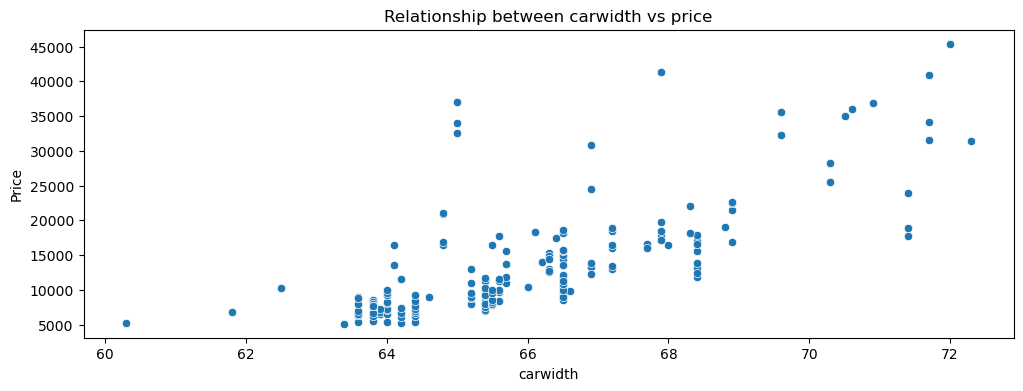

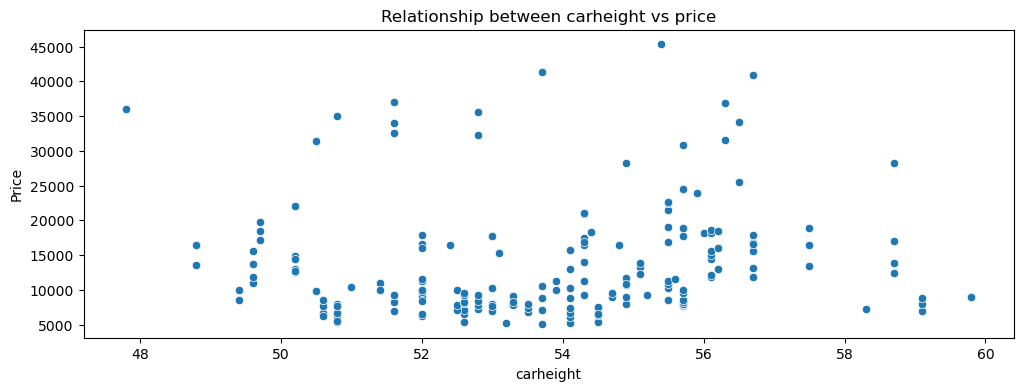

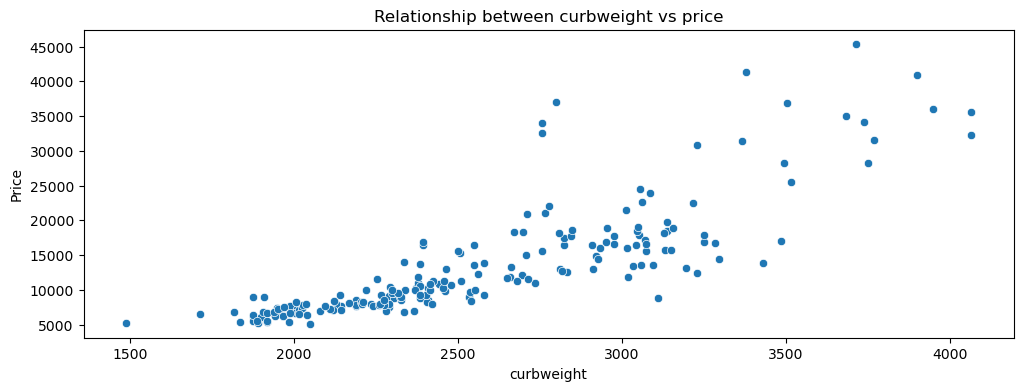

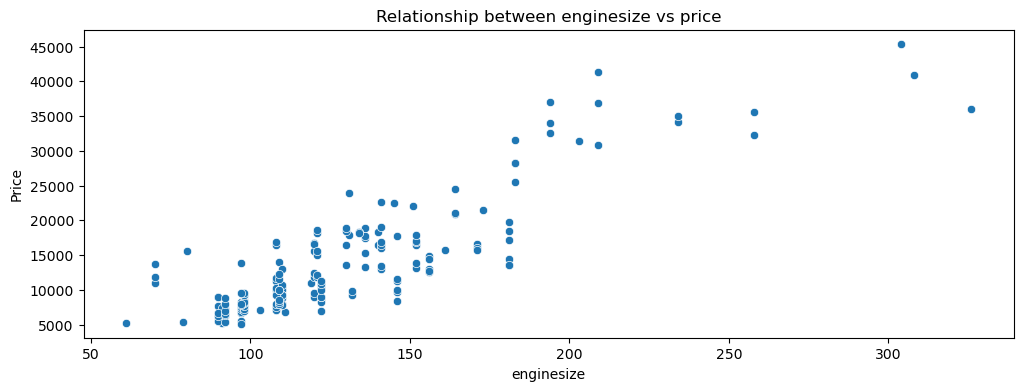

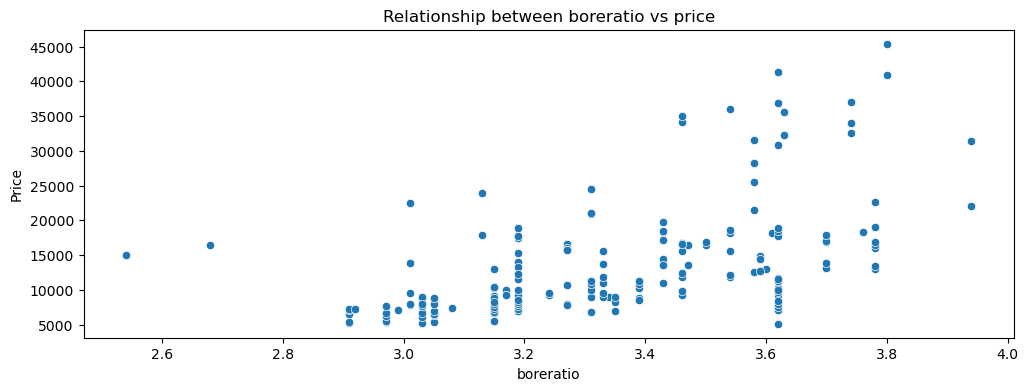

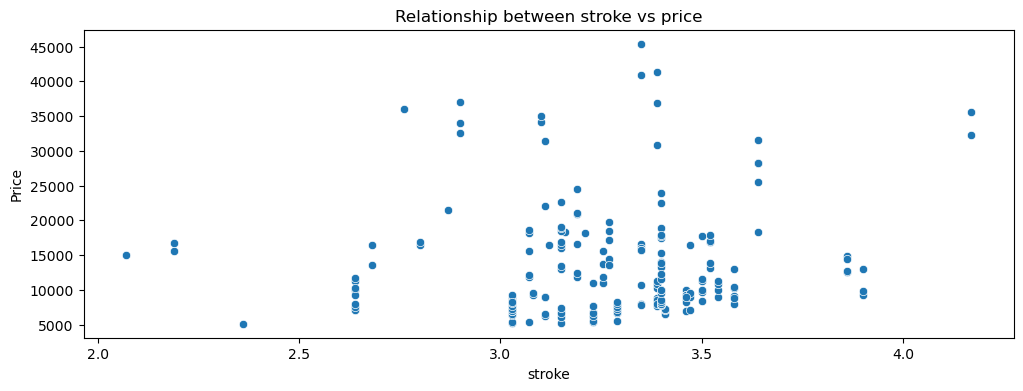

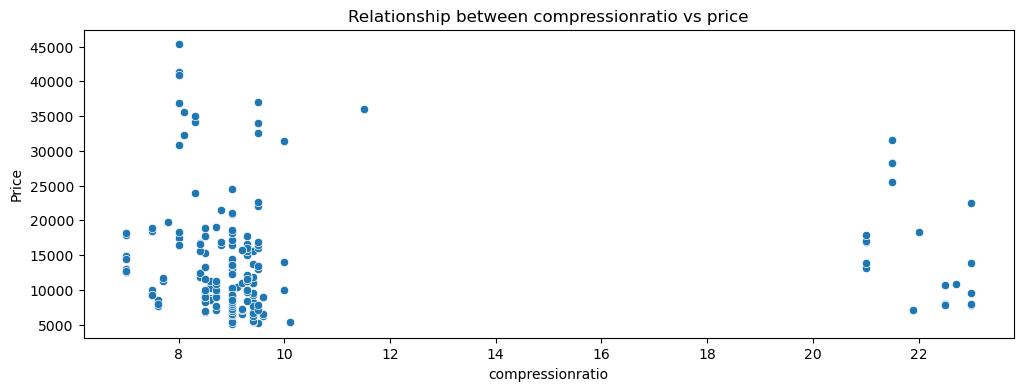

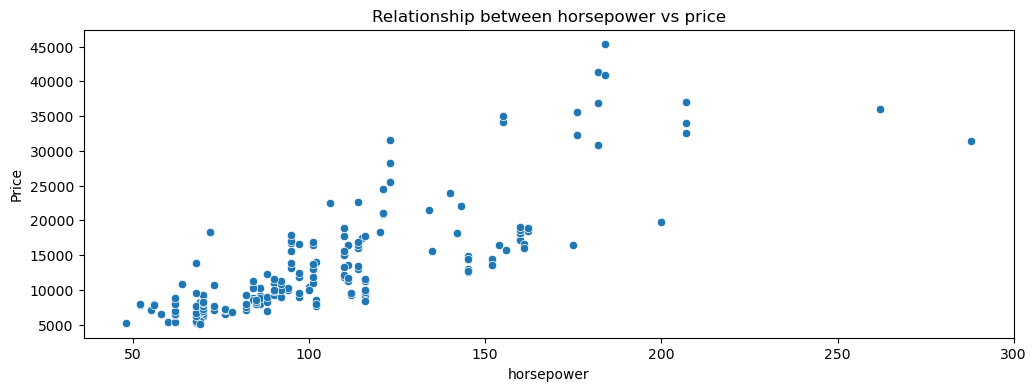

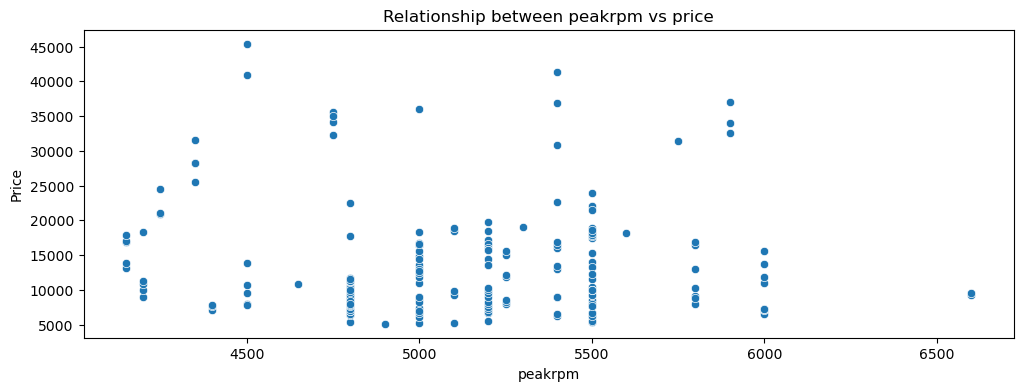

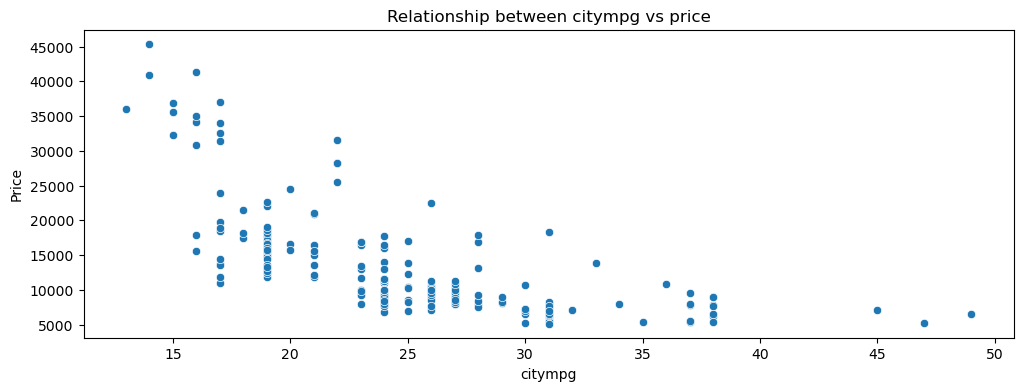

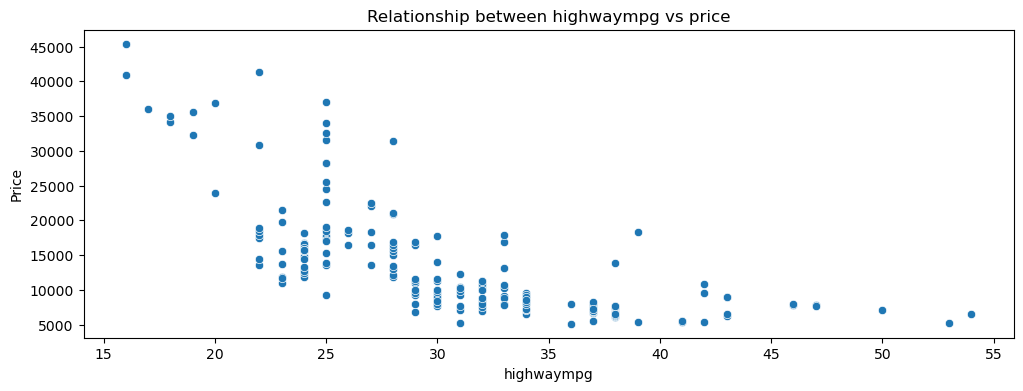

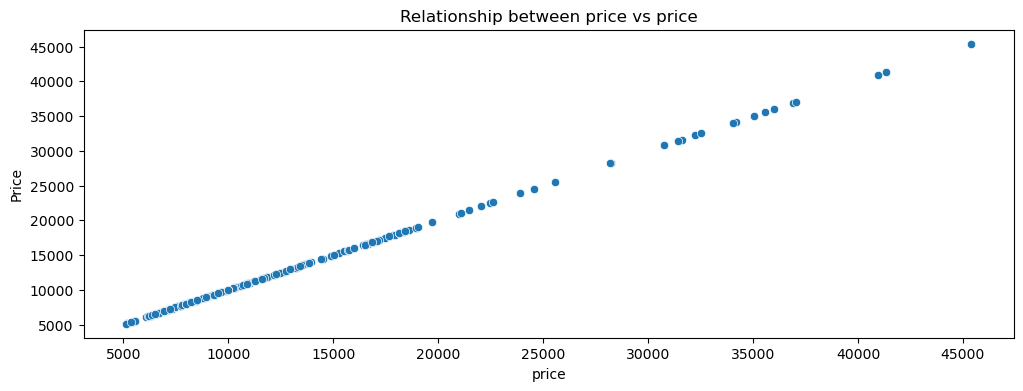

In [55]:
# Visualizing the relationship between Numerical features and price
for i in numerical_columns:
    plt.figure(figsize=(12,4))
    sns.scatterplot(x=i, y='price', data=df)
    plt.title(f'Relationship between {i} vs price')
    plt.xlabel(f'{i}')
    plt.ylabel('Price')
    plt.show()

### 
- Correlation

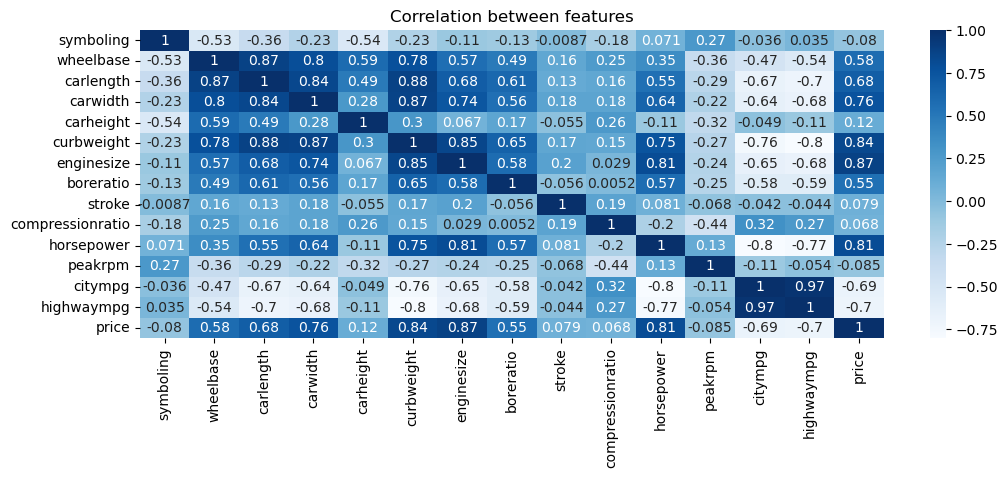

In [74]:
# Checking the correlation of the features
correlation = df.corr()
plt.figure(figsize=(12,4))
sns.heatmap(correlation, annot=True, cmap='Blues')

plt.title('Correlation between features')

plt.show()

#### Data preprocessing 2

In [76]:
df_cleaned_2 = df_cleaned.drop(['symboling', 'carheight', 'boreratio', 'stroke', 'compressionratio', 'peakrpm'], axis=1)
df_cleaned_2.head()

fueltype aspiration doornumber      carbody drivewheel enginelocation  \
0      gas        std        two  convertible        rwd          front   
1      gas        std        two  convertible        rwd          front   
2      gas        std        two    hatchback        rwd          front   
3      gas        std       four        sedan        fwd          front   
4      gas        std       four        sedan        4wd          front   

   wheelbase  carlength  carwidth  curbweight enginetype cylindernumber  \
0       88.6      168.8      64.1        2548       dohc           four   
1       88.6      168.8      64.1        2548       dohc           four   
2       94.5      171.2      65.5        2823       ohcv            six   
3       99.8      176.6      66.2        2337        ohc           four   
4       99.4      176.6      66.4        2824        ohc           five   

   enginesize fuelsystem  horsepower  citympg  highwaympg    price  \
0         130       mpfi         111       21          27  13495.0   
1         130       mpfi         111       21          27  16500.0   
2         152       mpfi         154       19          26  16500.0   
3         109       mpfi         102       24          30  13950.0   
4         136       mpfi         115       18          22  17450.0   

     car_brand  
0  alfa-romero  
1  alfa-romero  
2  alfa-romero  
3         audi  
4         audi

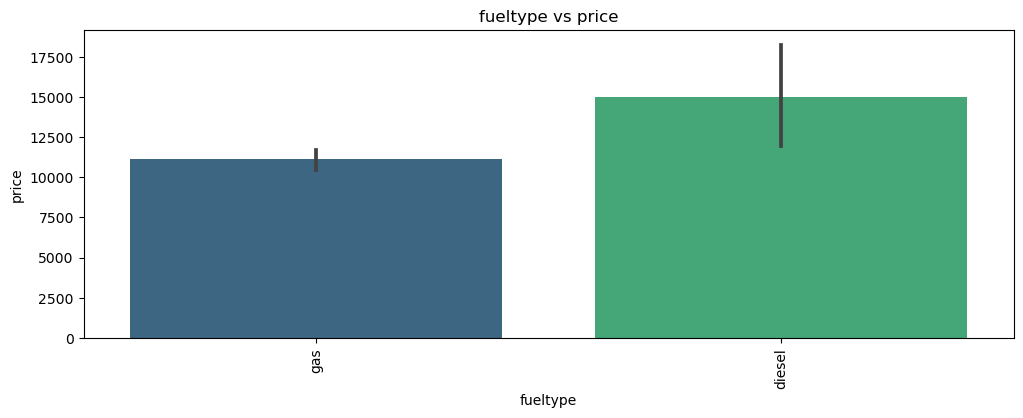

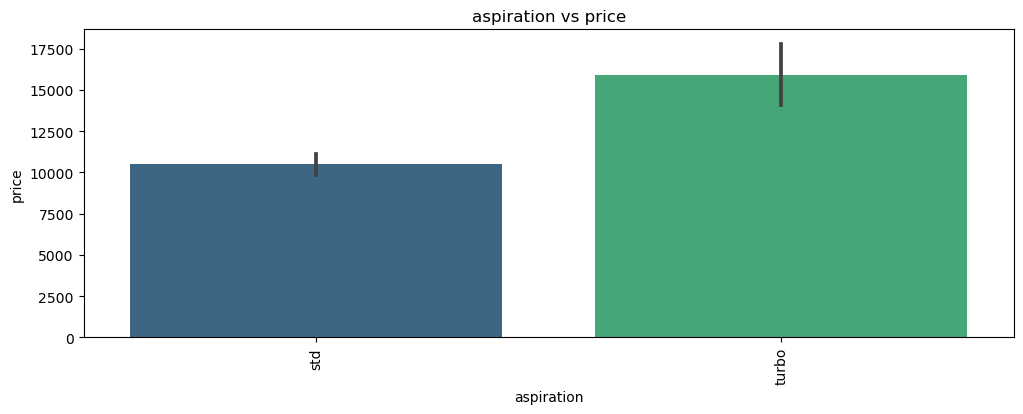

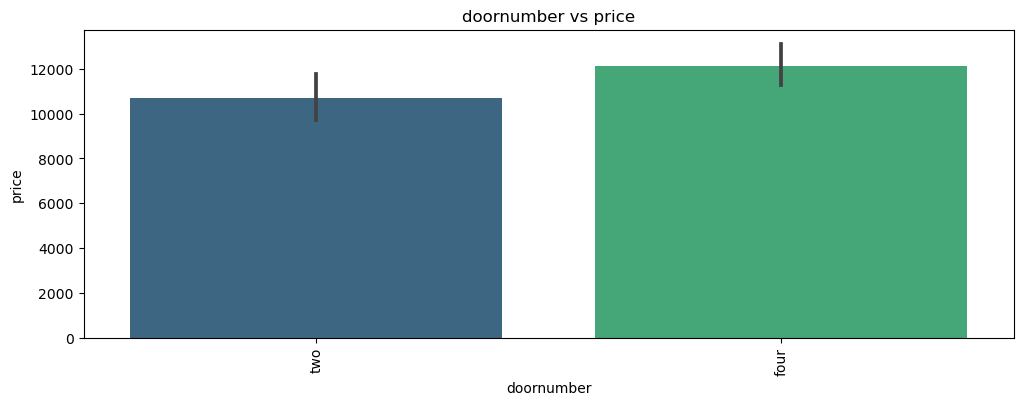

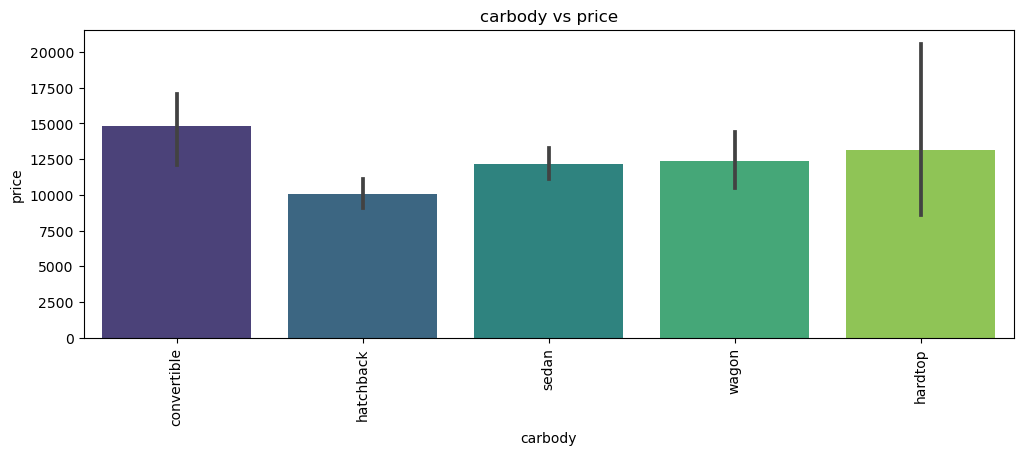

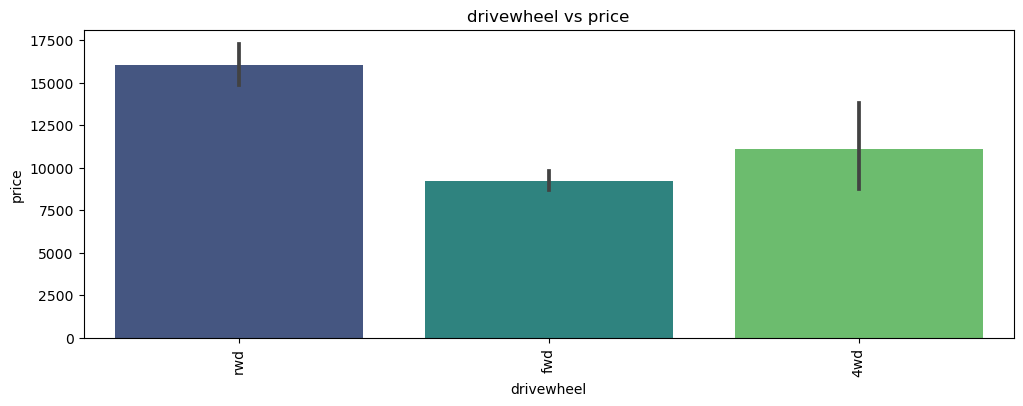

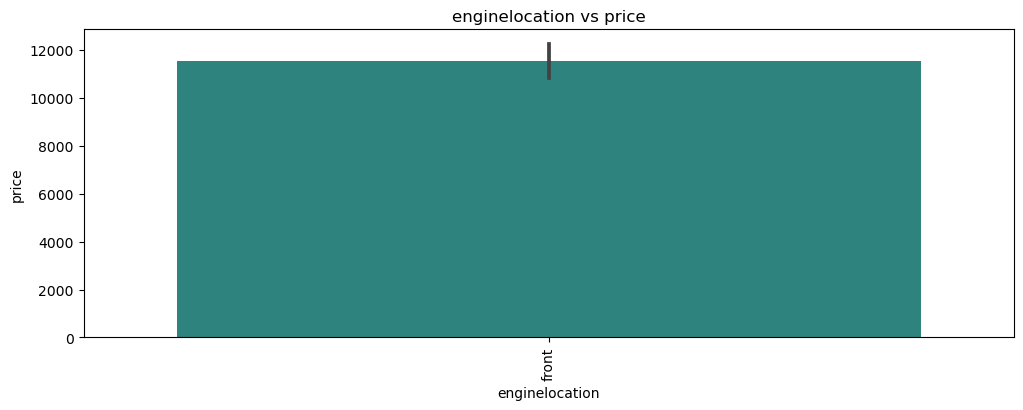

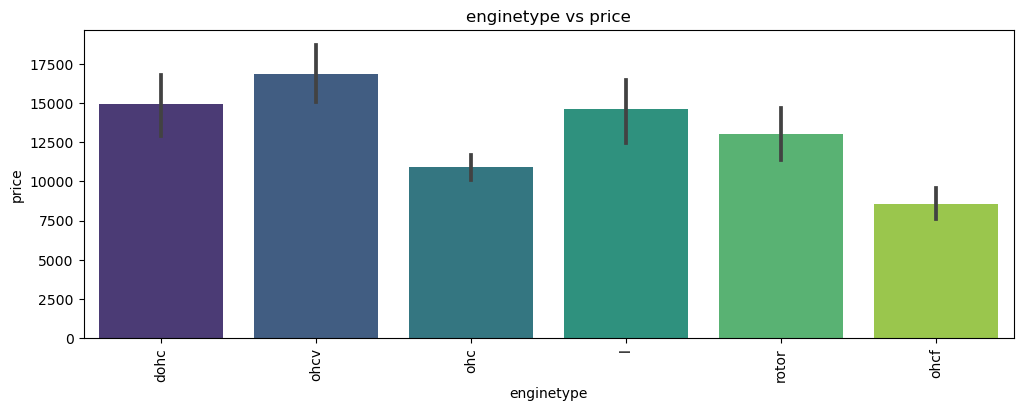

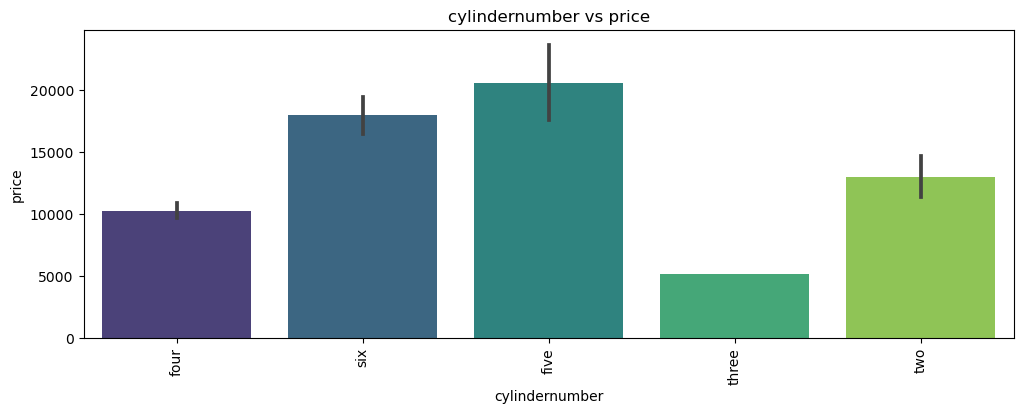

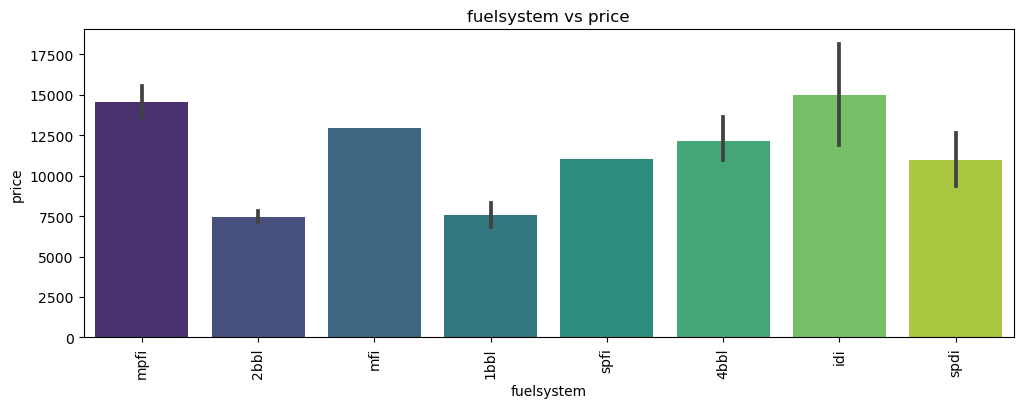

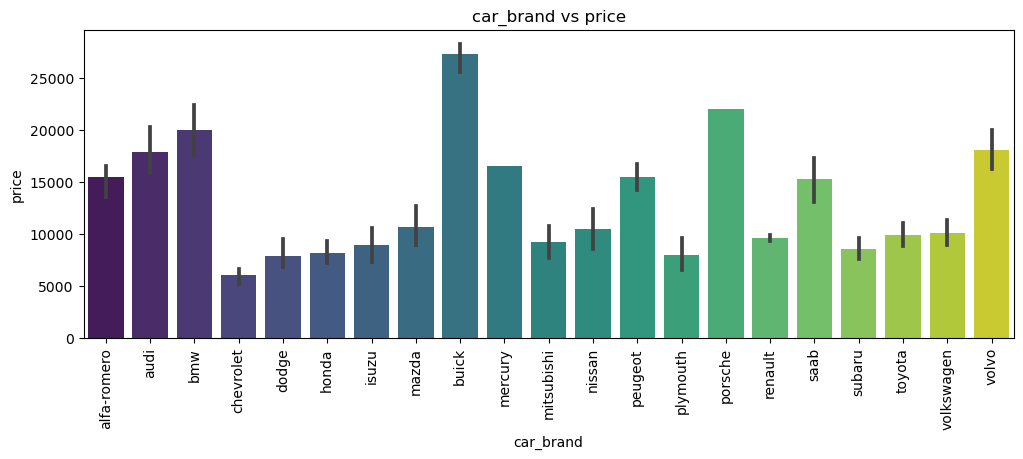

In [82]:
df_cat = df_cleaned_2.select_dtypes('object')
for i in df_cat:
    plt.figure(figsize=(12, 4))
    sns.barplot(x=df_cleaned_2[i], y='price', data=df_cleaned_2, palette='viridis')
    plt.title(f'{i} vs price')
    plt.xticks(rotation=90)

In [85]:
# Savingas a csv file
df_cleaned_2.to_csv('df_cleaned.csv')